In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_12800 = 'all_condition_stat_12800_filtered_max.csv'

In [3]:
data = pd.read_csv('./data/'+data_12800)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300,down
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300,down
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300,down
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300,down
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,583.231211,3.575957,2.872385,2.802993,0.030818,24.041893,1.967909,5.678236,50.651660,41.327268,...,0.027200,-4.553875,4.258986,-0.195173,-0.025525,4,6.0,5000,450,up
3562,580.421189,3.143293,2.918746,2.238513,0.010163,23.272022,2.152586,6.442916,54.398373,43.387011,...,0.032404,-4.331138,3.992545,-0.186024,0.438358,4,6.0,5000,450,up
3563,604.216465,3.415435,2.680779,2.670480,0.002692,20.326331,1.737523,4.027836,53.139158,42.652204,...,-0.054790,-4.232807,4.408266,0.124733,-0.246908,4,6.0,5000,500,up
3564,602.037207,3.527300,2.891382,2.728853,0.015913,22.578368,1.957310,5.237861,53.070980,42.595514,...,-0.041764,-4.056287,4.755409,0.231296,-0.233711,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [5]:
groups_feed = bdown.groupby('feed')

In [6]:
feed_300 = groups_feed.get_group(300)
feed_300 = feed_300.reset_index(drop=True)
feed_300 = feed_300.drop(['Milling_Type'], axis=1)

feed_350 = groups_feed.get_group(350)
feed_350 = feed_350.reset_index(drop=True)
feed_350 = feed_350.drop(['Milling_Type'], axis=1)

feed_400 = groups_feed.get_group(400)
feed_400 = feed_400.reset_index(drop=True)
feed_400 = feed_400.drop(['Milling_Type'], axis=1)

feed_450 = groups_feed.get_group(450)
feed_450 = feed_450.reset_index(drop=True)
feed_450 = feed_450.drop(['Milling_Type'], axis=1)

feed_500 = groups_feed.get_group(500)
feed_500 = feed_500.reset_index(drop=True)
feed_500 = feed_500.drop(['Milling_Type'], axis=1)

In [7]:
feed_300

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.145759,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.142357,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.179684,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.148164,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,0.145978,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,434.755117,1.220137,0.853889,0.998232,0.008084,5.862198,1.063005,1.158602,47.548767,39.705387,...,0.932825,0.072798,-2.308490,2.434473,-0.073018,-0.710511,4,6.0,5000,300
622,437.680332,1.397440,0.996945,1.136043,0.005870,6.848898,1.131154,1.333371,47.293863,39.637876,...,0.932735,0.069924,-2.509823,2.559663,-0.095174,-0.558488,4,6.0,5000,300
623,437.386205,1.388738,0.991723,1.116910,0.007582,6.896550,1.127103,1.287827,47.560418,39.846424,...,0.900866,0.006905,-2.480499,2.791398,0.128268,-0.493147,4,6.0,5000,300
624,438.948429,1.893562,1.341827,1.519634,0.003607,7.836071,0.903602,0.209859,47.532999,39.643689,...,0.885910,-0.003723,-2.462907,2.751458,0.092988,-0.363105,4,6.0,5000,300


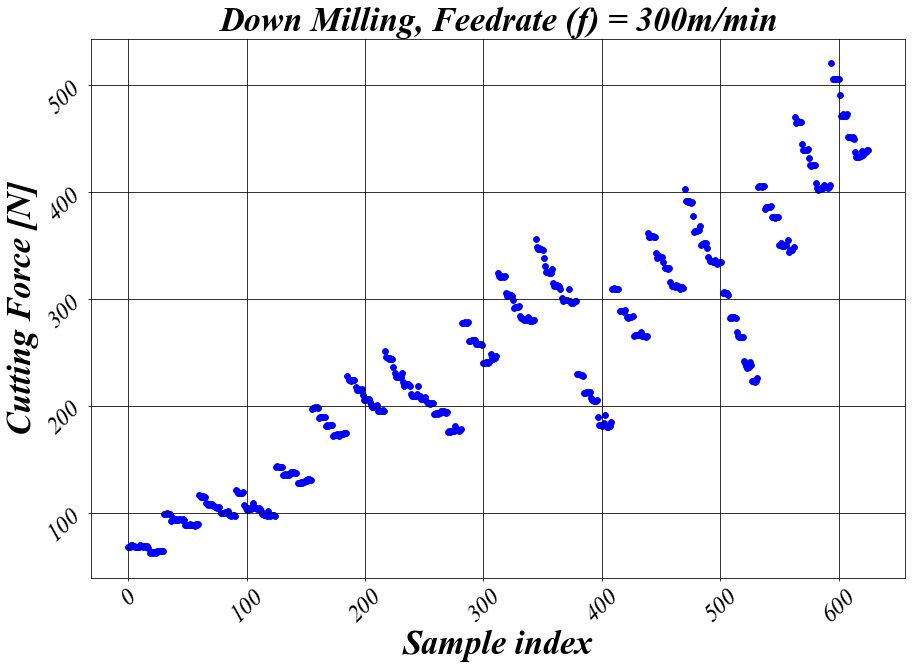

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 300m/min',**tfont)
plt.scatter(range(0, len(feed_300['RMS_CF_max'])), feed_300['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

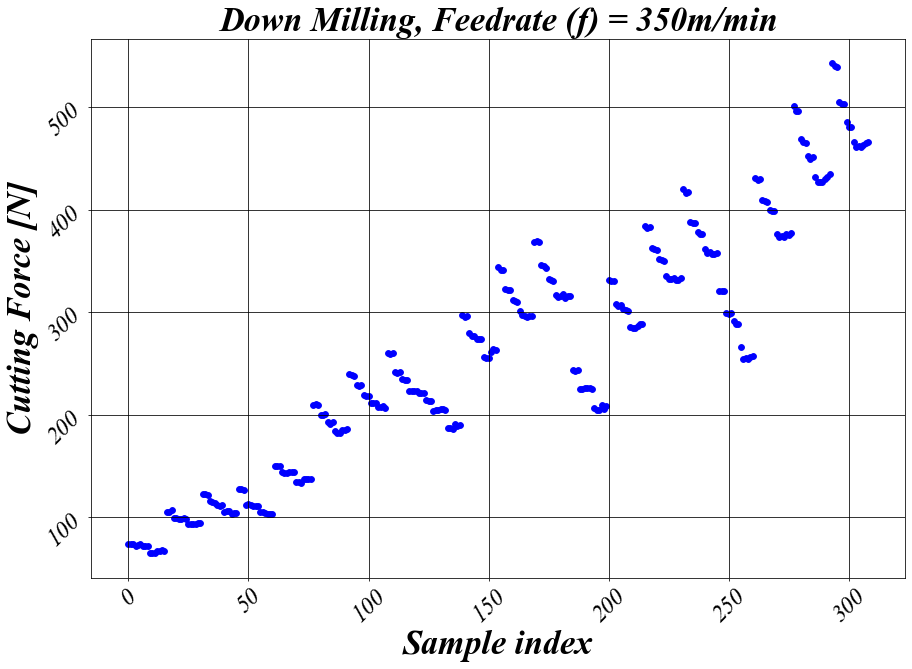

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 350m/min',**tfont)
plt.scatter(range(0, len(feed_350['RMS_CF_max'])), feed_350['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

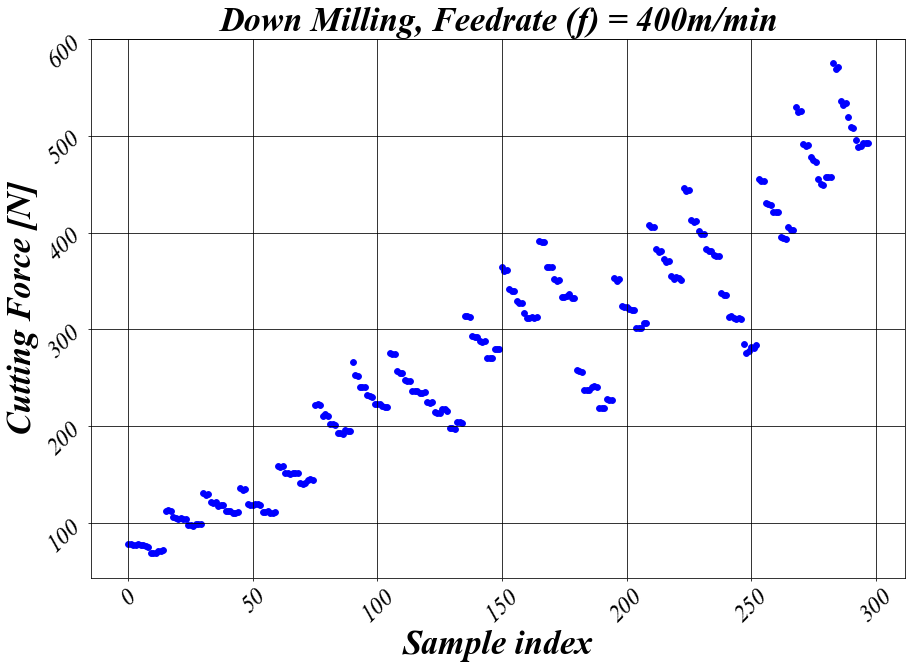

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 400m/min',**tfont)
plt.scatter(range(0, len(feed_400['RMS_CF_max'])), feed_400['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

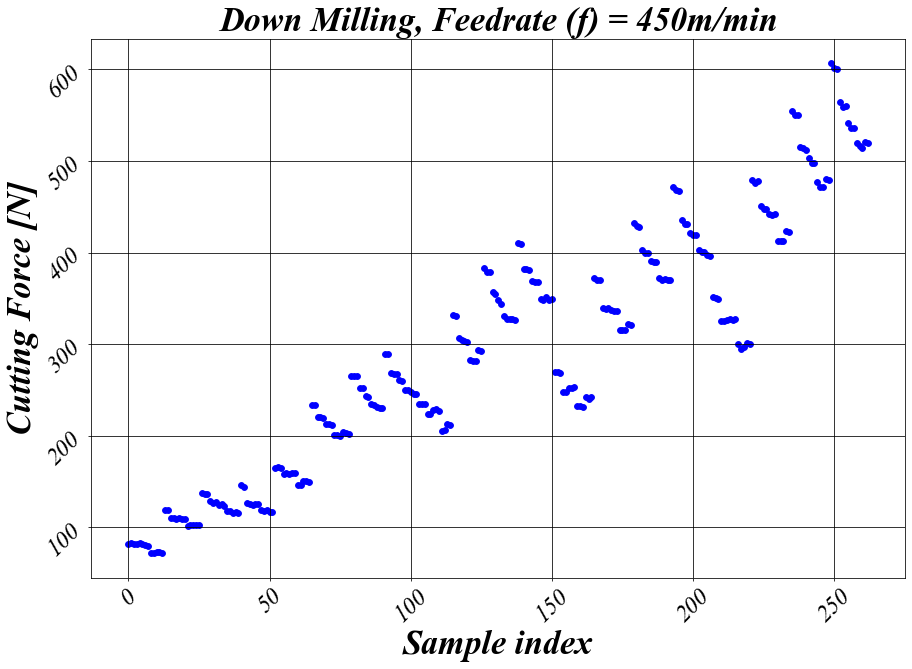

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 450m/min',**tfont)
plt.scatter(range(0, len(feed_450['RMS_CF_max'])), feed_450['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

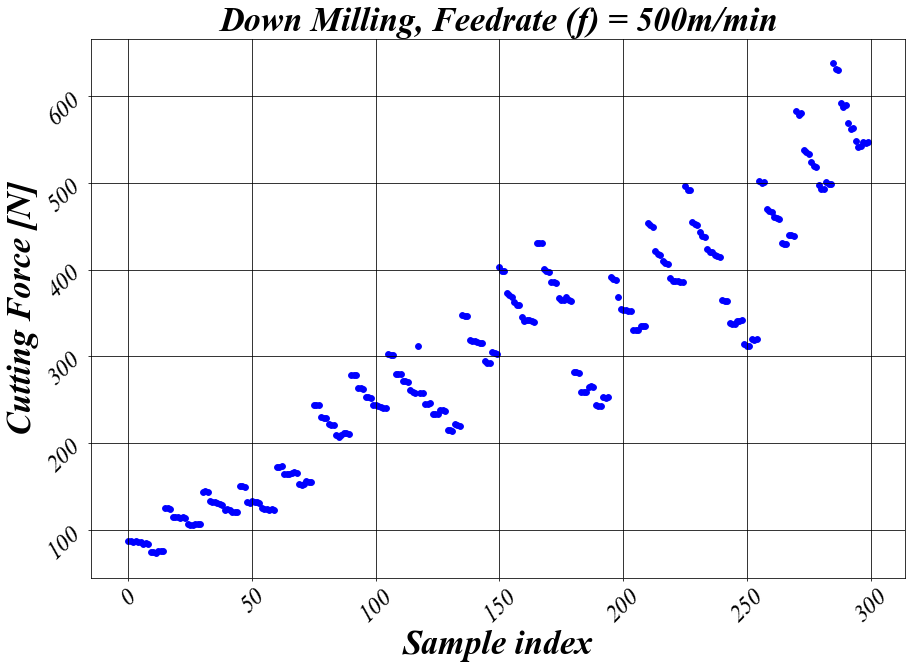

In [12]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 500m/min',**tfont)
plt.scatter(range(0, len(feed_500['RMS_CF_max'])), feed_500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

# ***feed 300 test***

In [13]:
train = pd.concat([feed_350, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [14]:
X_test = feed_300.iloc[: , 1:]
y_test = feed_300['RMS_CF_max']

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:307.02431	validation_0-mape:0.98770	validation_1-rmse:265.83842	validation_1-mape:0.98621
[1]	validation_0-rmse:304.01709	validation_0-mape:0.97785	validation_1-rmse:262.87536	validation_1-mape:0.97507
[2]	validation_0-rmse:301.03957	validation_0-mape:0.96810	validation_1-rmse:259.99840	validation_1-mape:0.96419
[3]	validation_0-rmse:298.09206	validation_0-mape:0.95844	validation_1-rmse:257.09442	validation_1-mape:0.95327
[4]	validation_0-rmse:295.17360	validation_0-mape:0.94889	validation_1-rmse:254.27500	validation_1-mape:0.94261
[5]	validation_0-rmse:292.28464	validation_0-mape:0.93942	validation_1-rmse:251.42895	validation_1-mape:0.93190
[6]	validation_0-rmse:289.42409	validation_0-mape:0.93006	validation_1-rmse:248.66597	validation_1-mape:0.92145
[7]	validation_0-rmse:286.59210	validation_0-mape:0.92079	validation_1-rmse:245.93075	validation_1-mape:0.91110
[8]	validation_0-rmse:283.78875	validation_0-mape:0.91159	validation_1-rmse:243.18954	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[23]	validation_0-rmse:244.93724	validation_0-mape:0.78422	validation_1-rmse:205.55382	validation_1-mape:0.75847
[24]	validation_0-rmse:242.54892	validation_0-mape:0.77639	validation_1-rmse:203.23945	validation_1-mape:0.74969
[25]	validation_0-rmse:240.18438	validation_0-mape:0.76864	validation_1-rmse:200.92691	validation_1-mape:0.74095
[26]	validation_0-rmse:237.84347	validation_0-mape:0.76096	validation_1-rmse:198.61862	validation_1-mape:0.73228
[27]	validation_0-rmse:235.52513	validation_0-mape:0.75337	validation_1-rmse:196.42141	validation_1-mape:0.72393
[28]	validation_0-rmse:233.22979	validation_0-mape:0.74584	validation_1-rmse:194.19998	validation_1-mape:0.71555
[29]	validation_0-rmse:230.95692	validation_0-mape:0.73840	validation_1-rmse:192.04421	validation_1-mape:0.70734
[30]	validation_0-rmse:228.70795	validation_0-mape:0.73103	validation_1-rmse:189.87348	validation_1-mape:0.69911
[31]	validation_0-rmse:226.47960	validation_0-mape:0.72373	validation_1-rmse:187.76795	validatio

[96]	validation_0-rmse:120.42961	validation_0-mape:0.37759	validation_1-rmse:88.91043	validation_1-mape:0.31598
[97]	validation_0-rmse:119.27437	validation_0-mape:0.37385	validation_1-rmse:87.83613	validation_1-mape:0.31197
[98]	validation_0-rmse:118.12761	validation_0-mape:0.37014	validation_1-rmse:86.83196	validation_1-mape:0.30817
[99]	validation_0-rmse:116.99110	validation_0-mape:0.36647	validation_1-rmse:85.83825	validation_1-mape:0.30435
[100]	validation_0-rmse:115.86598	validation_0-mape:0.36284	validation_1-rmse:84.85247	validation_1-mape:0.30059
[101]	validation_0-rmse:114.75466	validation_0-mape:0.35924	validation_1-rmse:83.89648	validation_1-mape:0.29690
[102]	validation_0-rmse:113.65336	validation_0-mape:0.35567	validation_1-rmse:82.92372	validation_1-mape:0.29338
[103]	validation_0-rmse:112.56300	validation_0-mape:0.35213	validation_1-rmse:81.95088	validation_1-mape:0.28985
[104]	validation_0-rmse:111.48339	validation_0-mape:0.34863	validation_1-rmse:81.02926	validation_1-

[170]	validation_0-rmse:59.34908	validation_0-mape:0.18056	validation_1-rmse:37.78672	validation_1-mape:0.12105
[171]	validation_0-rmse:58.79172	validation_0-mape:0.17876	validation_1-rmse:37.35716	validation_1-mape:0.11941
[172]	validation_0-rmse:58.24016	validation_0-mape:0.17699	validation_1-rmse:36.95302	validation_1-mape:0.11779
[173]	validation_0-rmse:57.69471	validation_0-mape:0.17523	validation_1-rmse:36.55636	validation_1-mape:0.11625
[174]	validation_0-rmse:57.15390	validation_0-mape:0.17349	validation_1-rmse:36.14031	validation_1-mape:0.11464
[175]	validation_0-rmse:56.61576	validation_0-mape:0.17177	validation_1-rmse:35.73877	validation_1-mape:0.11310
[176]	validation_0-rmse:56.08554	validation_0-mape:0.17007	validation_1-rmse:35.34022	validation_1-mape:0.11163
[177]	validation_0-rmse:55.56072	validation_0-mape:0.16838	validation_1-rmse:34.94494	validation_1-mape:0.11017
[178]	validation_0-rmse:55.04138	validation_0-mape:0.16671	validation_1-rmse:34.54855	validation_1-mape:

[244]	validation_0-rmse:29.83822	validation_0-mape:0.08669	validation_1-rmse:18.19014	validation_1-mape:0.04854
[245]	validation_0-rmse:29.56811	validation_0-mape:0.08584	validation_1-rmse:18.06031	validation_1-mape:0.04815
[246]	validation_0-rmse:29.29977	validation_0-mape:0.08499	validation_1-rmse:17.91819	validation_1-mape:0.04775
[247]	validation_0-rmse:29.03199	validation_0-mape:0.08416	validation_1-rmse:17.77898	validation_1-mape:0.04735
[248]	validation_0-rmse:28.76693	validation_0-mape:0.08333	validation_1-rmse:17.64126	validation_1-mape:0.04693
[249]	validation_0-rmse:28.50418	validation_0-mape:0.08252	validation_1-rmse:17.51381	validation_1-mape:0.04654
[250]	validation_0-rmse:28.24448	validation_0-mape:0.08171	validation_1-rmse:17.38130	validation_1-mape:0.04615
[251]	validation_0-rmse:27.98655	validation_0-mape:0.08091	validation_1-rmse:17.26427	validation_1-mape:0.04579
[252]	validation_0-rmse:27.73081	validation_0-mape:0.08012	validation_1-rmse:17.15347	validation_1-mape:

[318]	validation_0-rmse:15.38759	validation_0-mape:0.04185	validation_1-rmse:13.72726	validation_1-mape:0.04008
[319]	validation_0-rmse:15.25582	validation_0-mape:0.04144	validation_1-rmse:13.72810	validation_1-mape:0.04015
[320]	validation_0-rmse:15.12444	validation_0-mape:0.04103	validation_1-rmse:13.72589	validation_1-mape:0.04021
[321]	validation_0-rmse:14.99466	validation_0-mape:0.04063	validation_1-rmse:13.72388	validation_1-mape:0.04027
[322]	validation_0-rmse:14.86522	validation_0-mape:0.04024	validation_1-rmse:13.71501	validation_1-mape:0.04034
[323]	validation_0-rmse:14.73835	validation_0-mape:0.03985	validation_1-rmse:13.71774	validation_1-mape:0.04042
[324]	validation_0-rmse:14.61218	validation_0-mape:0.03946	validation_1-rmse:13.71747	validation_1-mape:0.04049
[325]	validation_0-rmse:14.48656	validation_0-mape:0.03908	validation_1-rmse:13.71000	validation_1-mape:0.04056
[326]	validation_0-rmse:14.36311	validation_0-mape:0.03870	validation_1-rmse:13.70975	validation_1-mape:

[392]	validation_0-rmse:8.36343	validation_0-mape:0.02075	validation_1-rmse:14.33863	validation_1-mape:0.04691
[393]	validation_0-rmse:8.29888	validation_0-mape:0.02057	validation_1-rmse:14.35541	validation_1-mape:0.04701
[394]	validation_0-rmse:8.23515	validation_0-mape:0.02039	validation_1-rmse:14.37282	validation_1-mape:0.04711
[395]	validation_0-rmse:8.17161	validation_0-mape:0.02022	validation_1-rmse:14.38664	validation_1-mape:0.04719
[396]	validation_0-rmse:8.10877	validation_0-mape:0.02004	validation_1-rmse:14.40007	validation_1-mape:0.04727
[397]	validation_0-rmse:8.04634	validation_0-mape:0.01987	validation_1-rmse:14.41620	validation_1-mape:0.04737
[398]	validation_0-rmse:7.98477	validation_0-mape:0.01970	validation_1-rmse:14.43059	validation_1-mape:0.04746
[399]	validation_0-rmse:7.92410	validation_0-mape:0.01952	validation_1-rmse:14.44046	validation_1-mape:0.04754
[400]	validation_0-rmse:7.86405	validation_0-mape:0.01936	validation_1-rmse:14.45557	validation_1-mape:0.04763
[

[466]	validation_0-rmse:4.93455	validation_0-mape:0.01167	validation_1-rmse:15.20865	validation_1-mape:0.05211
[467]	validation_0-rmse:4.90342	validation_0-mape:0.01160	validation_1-rmse:15.21860	validation_1-mape:0.05216
[468]	validation_0-rmse:4.87221	validation_0-mape:0.01153	validation_1-rmse:15.23157	validation_1-mape:0.05222
[469]	validation_0-rmse:4.84088	validation_0-mape:0.01145	validation_1-rmse:15.24192	validation_1-mape:0.05227
[470]	validation_0-rmse:4.81055	validation_0-mape:0.01138	validation_1-rmse:15.25143	validation_1-mape:0.05232
[471]	validation_0-rmse:4.77944	validation_0-mape:0.01131	validation_1-rmse:15.25980	validation_1-mape:0.05237
[472]	validation_0-rmse:4.74997	validation_0-mape:0.01124	validation_1-rmse:15.27091	validation_1-mape:0.05242
[473]	validation_0-rmse:4.71931	validation_0-mape:0.01117	validation_1-rmse:15.27935	validation_1-mape:0.05248
[474]	validation_0-rmse:4.69017	validation_0-mape:0.01110	validation_1-rmse:15.28570	validation_1-mape:0.05252
[

[540]	validation_0-rmse:3.24541	validation_0-mape:0.00797	validation_1-rmse:15.73644	validation_1-mape:0.05478
[541]	validation_0-rmse:3.23057	validation_0-mape:0.00794	validation_1-rmse:15.74396	validation_1-mape:0.05481
[542]	validation_0-rmse:3.21531	validation_0-mape:0.00791	validation_1-rmse:15.74943	validation_1-mape:0.05483
[543]	validation_0-rmse:3.20076	validation_0-mape:0.00788	validation_1-rmse:15.75141	validation_1-mape:0.05484
[544]	validation_0-rmse:3.18512	validation_0-mape:0.00785	validation_1-rmse:15.75680	validation_1-mape:0.05487
[545]	validation_0-rmse:3.16991	validation_0-mape:0.00782	validation_1-rmse:15.76218	validation_1-mape:0.05489
[546]	validation_0-rmse:3.15486	validation_0-mape:0.00779	validation_1-rmse:15.76805	validation_1-mape:0.05492
[547]	validation_0-rmse:3.14079	validation_0-mape:0.00776	validation_1-rmse:15.77096	validation_1-mape:0.05493
[548]	validation_0-rmse:3.12571	validation_0-mape:0.00773	validation_1-rmse:15.77650	validation_1-mape:0.05496
[

[614]	validation_0-rmse:2.42059	validation_0-mape:0.00645	validation_1-rmse:15.93938	validation_1-mape:0.05584
[615]	validation_0-rmse:2.41259	validation_0-mape:0.00644	validation_1-rmse:15.94150	validation_1-mape:0.05585
[616]	validation_0-rmse:2.40421	validation_0-mape:0.00643	validation_1-rmse:15.94375	validation_1-mape:0.05586
[617]	validation_0-rmse:2.39745	validation_0-mape:0.00641	validation_1-rmse:15.94433	validation_1-mape:0.05586
[618]	validation_0-rmse:2.39008	validation_0-mape:0.00640	validation_1-rmse:15.94632	validation_1-mape:0.05587
[619]	validation_0-rmse:2.38210	validation_0-mape:0.00639	validation_1-rmse:15.94875	validation_1-mape:0.05588
[620]	validation_0-rmse:2.37420	validation_0-mape:0.00637	validation_1-rmse:15.94886	validation_1-mape:0.05588
[621]	validation_0-rmse:2.36612	validation_0-mape:0.00636	validation_1-rmse:15.95090	validation_1-mape:0.05589
[622]	validation_0-rmse:2.35856	validation_0-mape:0.00635	validation_1-rmse:15.95340	validation_1-mape:0.05590
[

[688]	validation_0-rmse:1.95660	validation_0-mape:0.00562	validation_1-rmse:15.99753	validation_1-mape:0.05607
[689]	validation_0-rmse:1.95277	validation_0-mape:0.00562	validation_1-rmse:15.99888	validation_1-mape:0.05608
[690]	validation_0-rmse:1.94718	validation_0-mape:0.00560	validation_1-rmse:15.99918	validation_1-mape:0.05608
[691]	validation_0-rmse:1.94261	validation_0-mape:0.00559	validation_1-rmse:15.99964	validation_1-mape:0.05608
[692]	validation_0-rmse:1.93713	validation_0-mape:0.00558	validation_1-rmse:15.99990	validation_1-mape:0.05607
[693]	validation_0-rmse:1.93172	validation_0-mape:0.00557	validation_1-rmse:16.00009	validation_1-mape:0.05607
[694]	validation_0-rmse:1.92850	validation_0-mape:0.00556	validation_1-rmse:16.00137	validation_1-mape:0.05608
[695]	validation_0-rmse:1.92323	validation_0-mape:0.00555	validation_1-rmse:16.00161	validation_1-mape:0.05607
[696]	validation_0-rmse:1.91873	validation_0-mape:0.00554	validation_1-rmse:16.00163	validation_1-mape:0.05608
[

[762]	validation_0-rmse:1.67345	validation_0-mape:0.00499	validation_1-rmse:16.02742	validation_1-mape:0.05611
[763]	validation_0-rmse:1.66932	validation_0-mape:0.00498	validation_1-rmse:16.02624	validation_1-mape:0.05611
[764]	validation_0-rmse:1.66667	validation_0-mape:0.00498	validation_1-rmse:16.02678	validation_1-mape:0.05611
[765]	validation_0-rmse:1.66345	validation_0-mape:0.00497	validation_1-rmse:16.02782	validation_1-mape:0.05611
[766]	validation_0-rmse:1.65932	validation_0-mape:0.00496	validation_1-rmse:16.02653	validation_1-mape:0.05610
[767]	validation_0-rmse:1.65673	validation_0-mape:0.00495	validation_1-rmse:16.02705	validation_1-mape:0.05610
[768]	validation_0-rmse:1.65396	validation_0-mape:0.00495	validation_1-rmse:16.02801	validation_1-mape:0.05611
[769]	validation_0-rmse:1.65176	validation_0-mape:0.00494	validation_1-rmse:16.02848	validation_1-mape:0.05611
[770]	validation_0-rmse:1.64752	validation_0-mape:0.00493	validation_1-rmse:16.02723	validation_1-mape:0.05610
[

[836]	validation_0-rmse:1.47520	validation_0-mape:0.00451	validation_1-rmse:16.03149	validation_1-mape:0.05604
[837]	validation_0-rmse:1.47346	validation_0-mape:0.00451	validation_1-rmse:16.03198	validation_1-mape:0.05604
[838]	validation_0-rmse:1.47143	validation_0-mape:0.00451	validation_1-rmse:16.03088	validation_1-mape:0.05604
[839]	validation_0-rmse:1.46974	validation_0-mape:0.00450	validation_1-rmse:16.03118	validation_1-mape:0.05604
[840]	validation_0-rmse:1.46754	validation_0-mape:0.00450	validation_1-rmse:16.03152	validation_1-mape:0.05604
[841]	validation_0-rmse:1.46542	validation_0-mape:0.00449	validation_1-rmse:16.03216	validation_1-mape:0.05604
[842]	validation_0-rmse:1.46312	validation_0-mape:0.00448	validation_1-rmse:16.03142	validation_1-mape:0.05604
[843]	validation_0-rmse:1.45974	validation_0-mape:0.00448	validation_1-rmse:16.03148	validation_1-mape:0.05603
[844]	validation_0-rmse:1.45642	validation_0-mape:0.00447	validation_1-rmse:16.03148	validation_1-mape:0.05603
[

[910]	validation_0-rmse:1.34026	validation_0-mape:0.00415	validation_1-rmse:16.02670	validation_1-mape:0.05600
[911]	validation_0-rmse:1.33908	validation_0-mape:0.00415	validation_1-rmse:16.02690	validation_1-mape:0.05600
[912]	validation_0-rmse:1.33741	validation_0-mape:0.00414	validation_1-rmse:16.02726	validation_1-mape:0.05600
[913]	validation_0-rmse:1.33529	validation_0-mape:0.00414	validation_1-rmse:16.02702	validation_1-mape:0.05600
[914]	validation_0-rmse:1.33259	validation_0-mape:0.00413	validation_1-rmse:16.02664	validation_1-mape:0.05600
[915]	validation_0-rmse:1.32993	validation_0-mape:0.00413	validation_1-rmse:16.02632	validation_1-mape:0.05599
[916]	validation_0-rmse:1.32884	validation_0-mape:0.00412	validation_1-rmse:16.02667	validation_1-mape:0.05600
[917]	validation_0-rmse:1.32799	validation_0-mape:0.00412	validation_1-rmse:16.02699	validation_1-mape:0.05600
[918]	validation_0-rmse:1.32588	validation_0-mape:0.00411	validation_1-rmse:16.02736	validation_1-mape:0.05600
[

[984]	validation_0-rmse:1.23984	validation_0-mape:0.00389	validation_1-rmse:16.03133	validation_1-mape:0.05600
[985]	validation_0-rmse:1.23810	validation_0-mape:0.00388	validation_1-rmse:16.03119	validation_1-mape:0.05600
[986]	validation_0-rmse:1.23615	validation_0-mape:0.00388	validation_1-rmse:16.02965	validation_1-mape:0.05599
[987]	validation_0-rmse:1.23547	validation_0-mape:0.00388	validation_1-rmse:16.02968	validation_1-mape:0.05599
[988]	validation_0-rmse:1.23345	validation_0-mape:0.00387	validation_1-rmse:16.02940	validation_1-mape:0.05599
[989]	validation_0-rmse:1.23174	validation_0-mape:0.00387	validation_1-rmse:16.02878	validation_1-mape:0.05599
[990]	validation_0-rmse:1.23100	validation_0-mape:0.00386	validation_1-rmse:16.02889	validation_1-mape:0.05599
[991]	validation_0-rmse:1.23030	validation_0-mape:0.00386	validation_1-rmse:16.02887	validation_1-mape:0.05600
[992]	validation_0-rmse:1.22883	validation_0-mape:0.00386	validation_1-rmse:16.02913	validation_1-mape:0.05600
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.2205
Train MAPE: 0.3835
Test RMSE: 16.0261
Test MAPE: 5.5985


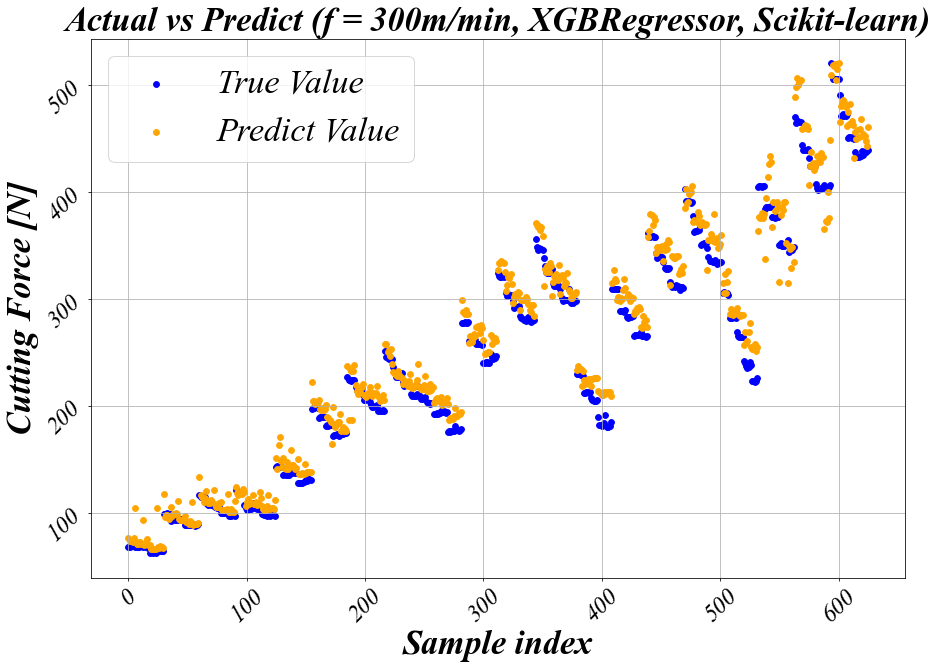

In [18]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 300m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

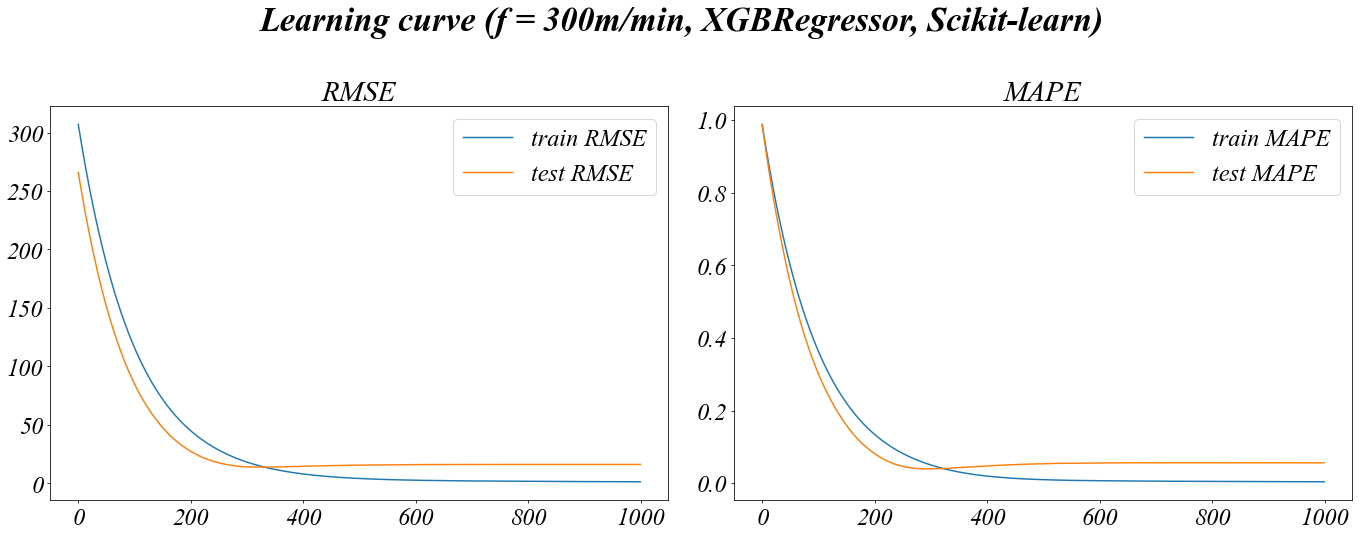

In [19]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 300m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 300_12800.png")

# ***feed 350 test***

In [20]:
train = pd.concat([feed_300, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [21]:
X_test = feed_350.iloc[: , 1:]
y_test = feed_350['RMS_CF_max']

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:295.54492	validation_0-mape:0.98753	validation_1-rmse:282.91816	validation_1-mape:0.98709
[1]	validation_0-rmse:292.65392	validation_0-mape:0.97765	validation_1-rmse:280.05288	validation_1-mape:0.97685
[2]	validation_0-rmse:289.79185	validation_0-mape:0.96787	validation_1-rmse:277.21618	validation_1-mape:0.96672
[3]	validation_0-rmse:286.95964	validation_0-mape:0.95815	validation_1-rmse:274.40669	validation_1-mape:0.95664
[4]	validation_0-rmse:284.15450	validation_0-mape:0.94856	validation_1-rmse:271.60889	validation_1-mape:0.94668
[5]	validation_0-rmse:281.37512	validation_0-mape:0.93906	validation_1-rmse:268.83695	validation_1-mape:0.93675
[6]	validation_0-rmse:278.62686	validation_0-mape:0.92965	validation_1-rmse:266.10845	validation_1-mape:0.92698
[7]	validation_0-rmse:275.90248	validation_0-mape:0.92035	validation_1-rmse:263.32266	validation_1-mape:0.91715
[8]	validation_0-rmse:273.20747	validation_0-mape:0.91113	validation_1-rmse:260.64477	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[17]	validation_0-rmse:250.12175	validation_0-mape:0.83220	validation_1-rmse:237.38014	validation_1-mape:0.82494
[18]	validation_0-rmse:247.68092	validation_0-mape:0.82386	validation_1-rmse:234.87728	validation_1-mape:0.81612
[19]	validation_0-rmse:245.26834	validation_0-mape:0.81559	validation_1-rmse:232.48933	validation_1-mape:0.80754
[20]	validation_0-rmse:242.87594	validation_0-mape:0.80743	validation_1-rmse:230.03869	validation_1-mape:0.79890
[21]	validation_0-rmse:240.51036	validation_0-mape:0.79934	validation_1-rmse:227.68903	validation_1-mape:0.79051
[22]	validation_0-rmse:238.16527	validation_0-mape:0.79133	validation_1-rmse:225.28338	validation_1-mape:0.78203
[23]	validation_0-rmse:235.84593	validation_0-mape:0.78342	validation_1-rmse:222.99245	validation_1-mape:0.77384
[24]	validation_0-rmse:233.55095	validation_0-mape:0.77557	validation_1-rmse:220.73012	validation_1-mape:0.76574
[25]	validation_0-rmse:231.27494	validation_0-mape:0.76781	validation_1-rmse:218.39176	validatio

[90]	validation_0-rmse:122.79777	validation_0-mape:0.40008	validation_1-rmse:110.46097	validation_1-mape:0.37800
[91]	validation_0-rmse:121.61407	validation_0-mape:0.39610	validation_1-rmse:109.32253	validation_1-mape:0.37402
[92]	validation_0-rmse:120.44227	validation_0-mape:0.39216	validation_1-rmse:108.18626	validation_1-mape:0.37005
[93]	validation_0-rmse:119.28298	validation_0-mape:0.38827	validation_1-rmse:107.04128	validation_1-mape:0.36597
[94]	validation_0-rmse:118.13382	validation_0-mape:0.38441	validation_1-rmse:105.93945	validation_1-mape:0.36213
[95]	validation_0-rmse:116.99739	validation_0-mape:0.38059	validation_1-rmse:104.82017	validation_1-mape:0.35814
[96]	validation_0-rmse:115.87088	validation_0-mape:0.37681	validation_1-rmse:103.66514	validation_1-mape:0.35418
[97]	validation_0-rmse:114.75571	validation_0-mape:0.37306	validation_1-rmse:102.57963	validation_1-mape:0.35037
[98]	validation_0-rmse:113.65235	validation_0-mape:0.36934	validation_1-rmse:101.48635	validatio

[163]	validation_0-rmse:60.95196	validation_0-mape:0.19309	validation_1-rmse:50.86462	validation_1-mape:0.16925
[164]	validation_0-rmse:60.37541	validation_0-mape:0.19118	validation_1-rmse:50.32229	validation_1-mape:0.16733
[165]	validation_0-rmse:59.80572	validation_0-mape:0.18928	validation_1-rmse:49.78948	validation_1-mape:0.16545
[166]	validation_0-rmse:59.24184	validation_0-mape:0.18740	validation_1-rmse:49.26640	validation_1-mape:0.16360
[167]	validation_0-rmse:58.68364	validation_0-mape:0.18554	validation_1-rmse:48.76798	validation_1-mape:0.16177
[168]	validation_0-rmse:58.13001	validation_0-mape:0.18370	validation_1-rmse:48.21385	validation_1-mape:0.15985
[169]	validation_0-rmse:57.58277	validation_0-mape:0.18187	validation_1-rmse:47.70331	validation_1-mape:0.15805
[170]	validation_0-rmse:57.04110	validation_0-mape:0.18007	validation_1-rmse:47.19041	validation_1-mape:0.15625
[171]	validation_0-rmse:56.50470	validation_0-mape:0.17828	validation_1-rmse:46.70026	validation_1-mape:

[237]	validation_0-rmse:30.59937	validation_0-mape:0.09235	validation_1-rmse:23.20132	validation_1-mape:0.07065
[238]	validation_0-rmse:30.32053	validation_0-mape:0.09145	validation_1-rmse:22.98937	validation_1-mape:0.06989
[239]	validation_0-rmse:30.04684	validation_0-mape:0.09054	validation_1-rmse:22.75736	validation_1-mape:0.06908
[240]	validation_0-rmse:29.77296	validation_0-mape:0.08965	validation_1-rmse:22.50704	validation_1-mape:0.06825
[241]	validation_0-rmse:29.50100	validation_0-mape:0.08877	validation_1-rmse:22.26493	validation_1-mape:0.06746
[242]	validation_0-rmse:29.23552	validation_0-mape:0.08789	validation_1-rmse:22.04204	validation_1-mape:0.06668
[243]	validation_0-rmse:28.96984	validation_0-mape:0.08702	validation_1-rmse:21.80831	validation_1-mape:0.06590
[244]	validation_0-rmse:28.70960	validation_0-mape:0.08616	validation_1-rmse:21.59007	validation_1-mape:0.06514
[245]	validation_0-rmse:28.44821	validation_0-mape:0.08531	validation_1-rmse:21.36559	validation_1-mape:

[311]	validation_0-rmse:15.89785	validation_0-mape:0.04447	validation_1-rmse:12.19367	validation_1-mape:0.03311
[312]	validation_0-rmse:15.76162	validation_0-mape:0.04403	validation_1-rmse:12.11825	validation_1-mape:0.03287
[313]	validation_0-rmse:15.62830	validation_0-mape:0.04360	validation_1-rmse:12.04431	validation_1-mape:0.03264
[314]	validation_0-rmse:15.49465	validation_0-mape:0.04318	validation_1-rmse:11.97411	validation_1-mape:0.03241
[315]	validation_0-rmse:15.36411	validation_0-mape:0.04276	validation_1-rmse:11.89133	validation_1-mape:0.03218
[316]	validation_0-rmse:15.23324	validation_0-mape:0.04234	validation_1-rmse:11.82488	validation_1-mape:0.03197
[317]	validation_0-rmse:15.10531	validation_0-mape:0.04193	validation_1-rmse:11.75621	validation_1-mape:0.03176
[318]	validation_0-rmse:14.97705	validation_0-mape:0.04152	validation_1-rmse:11.69233	validation_1-mape:0.03155
[319]	validation_0-rmse:14.85032	validation_0-mape:0.04112	validation_1-rmse:11.62786	validation_1-mape:

[385]	validation_0-rmse:8.81118	validation_0-mape:0.02225	validation_1-rmse:9.52935	validation_1-mape:0.02621
[386]	validation_0-rmse:8.74793	validation_0-mape:0.02207	validation_1-rmse:9.51898	validation_1-mape:0.02622
[387]	validation_0-rmse:8.68551	validation_0-mape:0.02188	validation_1-rmse:9.51508	validation_1-mape:0.02623
[388]	validation_0-rmse:8.62381	validation_0-mape:0.02171	validation_1-rmse:9.51092	validation_1-mape:0.02625
[389]	validation_0-rmse:8.56192	validation_0-mape:0.02153	validation_1-rmse:9.50502	validation_1-mape:0.02627
[390]	validation_0-rmse:8.49959	validation_0-mape:0.02135	validation_1-rmse:9.49760	validation_1-mape:0.02627
[391]	validation_0-rmse:8.43965	validation_0-mape:0.02118	validation_1-rmse:9.49506	validation_1-mape:0.02628
[392]	validation_0-rmse:8.38056	validation_0-mape:0.02101	validation_1-rmse:9.49225	validation_1-mape:0.02630
[393]	validation_0-rmse:8.32221	validation_0-mape:0.02085	validation_1-rmse:9.49127	validation_1-mape:0.02632
[394]	vali

[460]	validation_0-rmse:5.47010	validation_0-mape:0.01320	validation_1-rmse:9.69378	validation_1-mape:0.02765
[461]	validation_0-rmse:5.44050	validation_0-mape:0.01313	validation_1-rmse:9.70164	validation_1-mape:0.02767
[462]	validation_0-rmse:5.40814	validation_0-mape:0.01305	validation_1-rmse:9.70510	validation_1-mape:0.02769
[463]	validation_0-rmse:5.38013	validation_0-mape:0.01298	validation_1-rmse:9.71364	validation_1-mape:0.02771
[464]	validation_0-rmse:5.35119	validation_0-mape:0.01291	validation_1-rmse:9.72237	validation_1-mape:0.02774
[465]	validation_0-rmse:5.32369	validation_0-mape:0.01284	validation_1-rmse:9.72737	validation_1-mape:0.02775
[466]	validation_0-rmse:5.29496	validation_0-mape:0.01277	validation_1-rmse:9.73206	validation_1-mape:0.02777
[467]	validation_0-rmse:5.26399	validation_0-mape:0.01270	validation_1-rmse:9.73716	validation_1-mape:0.02779
[468]	validation_0-rmse:5.23342	validation_0-mape:0.01263	validation_1-rmse:9.74232	validation_1-mape:0.02781
[469]	vali

[535]	validation_0-rmse:3.80234	validation_0-mape:0.00956	validation_1-rmse:10.08552	validation_1-mape:0.02899
[536]	validation_0-rmse:3.78718	validation_0-mape:0.00953	validation_1-rmse:10.08685	validation_1-mape:0.02899
[537]	validation_0-rmse:3.77327	validation_0-mape:0.00950	validation_1-rmse:10.09456	validation_1-mape:0.02902
[538]	validation_0-rmse:3.75762	validation_0-mape:0.00947	validation_1-rmse:10.09968	validation_1-mape:0.02904
[539]	validation_0-rmse:3.74434	validation_0-mape:0.00944	validation_1-rmse:10.10744	validation_1-mape:0.02906
[540]	validation_0-rmse:3.72915	validation_0-mape:0.00942	validation_1-rmse:10.11129	validation_1-mape:0.02908
[541]	validation_0-rmse:3.71382	validation_0-mape:0.00939	validation_1-rmse:10.11528	validation_1-mape:0.02910
[542]	validation_0-rmse:3.69925	validation_0-mape:0.00936	validation_1-rmse:10.11806	validation_1-mape:0.02911
[543]	validation_0-rmse:3.68411	validation_0-mape:0.00933	validation_1-rmse:10.12100	validation_1-mape:0.02911
[

[609]	validation_0-rmse:2.95315	validation_0-mape:0.00791	validation_1-rmse:10.30737	validation_1-mape:0.02965
[610]	validation_0-rmse:2.94306	validation_0-mape:0.00789	validation_1-rmse:10.31138	validation_1-mape:0.02966
[611]	validation_0-rmse:2.93445	validation_0-mape:0.00787	validation_1-rmse:10.31506	validation_1-mape:0.02967
[612]	validation_0-rmse:2.92710	validation_0-mape:0.00786	validation_1-rmse:10.31611	validation_1-mape:0.02967
[613]	validation_0-rmse:2.92013	validation_0-mape:0.00785	validation_1-rmse:10.31690	validation_1-mape:0.02968
[614]	validation_0-rmse:2.91085	validation_0-mape:0.00783	validation_1-rmse:10.32135	validation_1-mape:0.02969
[615]	validation_0-rmse:2.90366	validation_0-mape:0.00781	validation_1-rmse:10.32285	validation_1-mape:0.02969
[616]	validation_0-rmse:2.89570	validation_0-mape:0.00780	validation_1-rmse:10.32684	validation_1-mape:0.02970
[617]	validation_0-rmse:2.88854	validation_0-mape:0.00778	validation_1-rmse:10.32750	validation_1-mape:0.02970
[

[683]	validation_0-rmse:2.48856	validation_0-mape:0.00697	validation_1-rmse:10.43928	validation_1-mape:0.03008
[684]	validation_0-rmse:2.48446	validation_0-mape:0.00697	validation_1-rmse:10.43984	validation_1-mape:0.03008
[685]	validation_0-rmse:2.48047	validation_0-mape:0.00696	validation_1-rmse:10.44098	validation_1-mape:0.03009
[686]	validation_0-rmse:2.47593	validation_0-mape:0.00695	validation_1-rmse:10.44350	validation_1-mape:0.03009
[687]	validation_0-rmse:2.47193	validation_0-mape:0.00694	validation_1-rmse:10.44411	validation_1-mape:0.03009
[688]	validation_0-rmse:2.46711	validation_0-mape:0.00693	validation_1-rmse:10.44516	validation_1-mape:0.03009
[689]	validation_0-rmse:2.46321	validation_0-mape:0.00692	validation_1-rmse:10.44562	validation_1-mape:0.03009
[690]	validation_0-rmse:2.45994	validation_0-mape:0.00691	validation_1-rmse:10.44654	validation_1-mape:0.03009
[691]	validation_0-rmse:2.45671	validation_0-mape:0.00690	validation_1-rmse:10.44644	validation_1-mape:0.03009
[

[757]	validation_0-rmse:2.19174	validation_0-mape:0.00633	validation_1-rmse:10.49774	validation_1-mape:0.03024
[758]	validation_0-rmse:2.18694	validation_0-mape:0.00631	validation_1-rmse:10.49841	validation_1-mape:0.03024
[759]	validation_0-rmse:2.18500	validation_0-mape:0.00631	validation_1-rmse:10.49939	validation_1-mape:0.03025
[760]	validation_0-rmse:2.18037	validation_0-mape:0.00630	validation_1-rmse:10.49905	validation_1-mape:0.03024
[761]	validation_0-rmse:2.17817	validation_0-mape:0.00629	validation_1-rmse:10.49978	validation_1-mape:0.03025
[762]	validation_0-rmse:2.17414	validation_0-mape:0.00628	validation_1-rmse:10.50091	validation_1-mape:0.03025
[763]	validation_0-rmse:2.16946	validation_0-mape:0.00627	validation_1-rmse:10.50173	validation_1-mape:0.03025
[764]	validation_0-rmse:2.16680	validation_0-mape:0.00626	validation_1-rmse:10.50272	validation_1-mape:0.03026
[765]	validation_0-rmse:2.16313	validation_0-mape:0.00626	validation_1-rmse:10.50415	validation_1-mape:0.03026
[

[831]	validation_0-rmse:1.96945	validation_0-mape:0.00577	validation_1-rmse:10.53391	validation_1-mape:0.03039
[832]	validation_0-rmse:1.96687	validation_0-mape:0.00576	validation_1-rmse:10.53393	validation_1-mape:0.03039
[833]	validation_0-rmse:1.96455	validation_0-mape:0.00575	validation_1-rmse:10.53502	validation_1-mape:0.03040
[834]	validation_0-rmse:1.96285	validation_0-mape:0.00575	validation_1-rmse:10.53539	validation_1-mape:0.03040
[835]	validation_0-rmse:1.96025	validation_0-mape:0.00574	validation_1-rmse:10.53543	validation_1-mape:0.03040
[836]	validation_0-rmse:1.95852	validation_0-mape:0.00574	validation_1-rmse:10.53602	validation_1-mape:0.03040
[837]	validation_0-rmse:1.95596	validation_0-mape:0.00573	validation_1-rmse:10.53605	validation_1-mape:0.03040
[838]	validation_0-rmse:1.95315	validation_0-mape:0.00572	validation_1-rmse:10.53715	validation_1-mape:0.03040
[839]	validation_0-rmse:1.95145	validation_0-mape:0.00572	validation_1-rmse:10.53774	validation_1-mape:0.03040
[

[905]	validation_0-rmse:1.83040	validation_0-mape:0.00542	validation_1-rmse:10.54945	validation_1-mape:0.03046
[906]	validation_0-rmse:1.82963	validation_0-mape:0.00541	validation_1-rmse:10.55007	validation_1-mape:0.03046
[907]	validation_0-rmse:1.82816	validation_0-mape:0.00541	validation_1-rmse:10.55030	validation_1-mape:0.03046
[908]	validation_0-rmse:1.82699	validation_0-mape:0.00541	validation_1-rmse:10.55031	validation_1-mape:0.03046
[909]	validation_0-rmse:1.82407	validation_0-mape:0.00540	validation_1-rmse:10.55146	validation_1-mape:0.03046
[910]	validation_0-rmse:1.82273	validation_0-mape:0.00540	validation_1-rmse:10.55164	validation_1-mape:0.03046
[911]	validation_0-rmse:1.82198	validation_0-mape:0.00539	validation_1-rmse:10.55203	validation_1-mape:0.03046
[912]	validation_0-rmse:1.82064	validation_0-mape:0.00539	validation_1-rmse:10.55242	validation_1-mape:0.03046
[913]	validation_0-rmse:1.81925	validation_0-mape:0.00539	validation_1-rmse:10.55224	validation_1-mape:0.03046
[

[979]	validation_0-rmse:1.72153	validation_0-mape:0.00513	validation_1-rmse:10.56696	validation_1-mape:0.03047
[980]	validation_0-rmse:1.72052	validation_0-mape:0.00513	validation_1-rmse:10.56697	validation_1-mape:0.03047
[981]	validation_0-rmse:1.71979	validation_0-mape:0.00513	validation_1-rmse:10.56682	validation_1-mape:0.03047
[982]	validation_0-rmse:1.71832	validation_0-mape:0.00512	validation_1-rmse:10.56701	validation_1-mape:0.03047
[983]	validation_0-rmse:1.71715	validation_0-mape:0.00512	validation_1-rmse:10.56715	validation_1-mape:0.03047
[984]	validation_0-rmse:1.71525	validation_0-mape:0.00511	validation_1-rmse:10.56753	validation_1-mape:0.03047
[985]	validation_0-rmse:1.71439	validation_0-mape:0.00511	validation_1-rmse:10.56842	validation_1-mape:0.03047
[986]	validation_0-rmse:1.71312	validation_0-mape:0.00511	validation_1-rmse:10.56798	validation_1-mape:0.03047
[987]	validation_0-rmse:1.71172	validation_0-mape:0.00510	validation_1-rmse:10.56843	validation_1-mape:0.03047
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.6980
Train MAPE: 0.5065
Test RMSE: 10.5708
Test MAPE: 3.0471


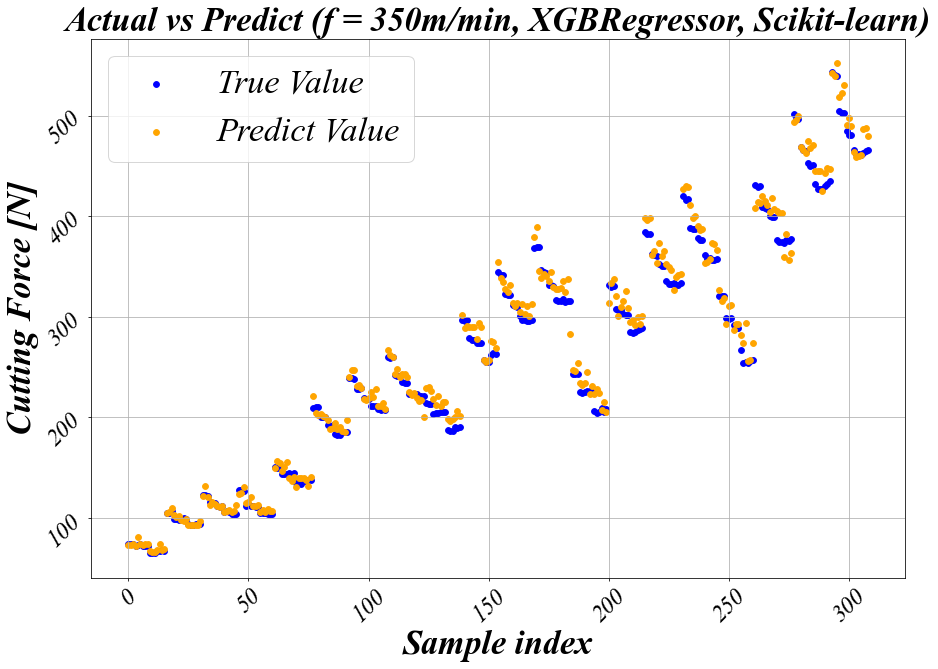

In [25]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 350m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

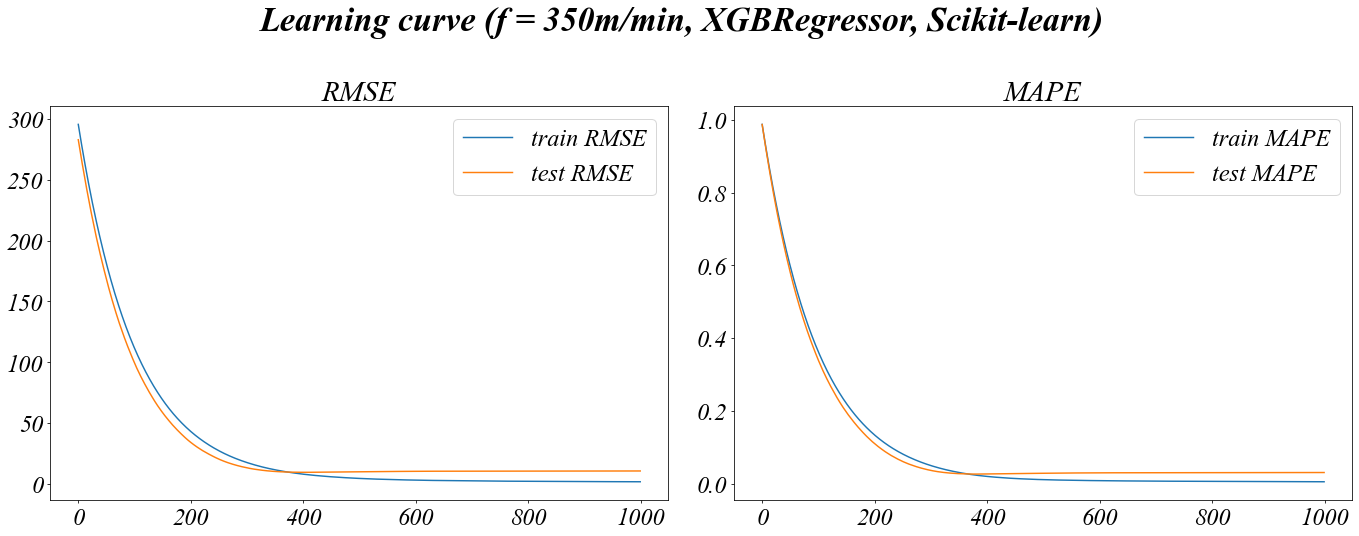

In [26]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 350m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 350_12800.png")

# ***feed 400 test***

In [27]:
train = pd.concat([feed_300, feed_350, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [28]:
X_test = feed_400.iloc[: , 1:]
y_test = feed_400['RMS_CF_max']

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:292.39825	validation_0-mape:0.98754	validation_1-rmse:298.55044	validation_1-mape:0.98759
[1]	validation_0-rmse:289.53843	validation_0-mape:0.97767	validation_1-rmse:295.64121	validation_1-mape:0.97770
[2]	validation_0-rmse:286.70759	validation_0-mape:0.96789	validation_1-rmse:292.75999	validation_1-mape:0.96790
[3]	validation_0-rmse:283.90467	validation_0-mape:0.95821	validation_1-rmse:289.90654	validation_1-mape:0.95818
[4]	validation_0-rmse:281.12977	validation_0-mape:0.94863	validation_1-rmse:287.08407	validation_1-mape:0.94858
[5]	validation_0-rmse:278.38206	validation_0-mape:0.93913	validation_1-rmse:284.28560	validation_1-mape:0.93908
[6]	validation_0-rmse:275.66238	validation_0-mape:0.92974	validation_1-rmse:281.52088	validation_1-mape:0.92967
[7]	validation_0-rmse:272.96894	validation_0-mape:0.92043	validation_1-rmse:278.77881	validation_1-mape:0.92037
[8]	validation_0-rmse:270.30369	validation_0-mape:0.91122	validation_1-rmse:275.99237	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[15]	validation_0-rmse:252.37097	validation_0-mape:0.84924	validation_1-rmse:257.55813	validation_1-mape:0.84866
[16]	validation_0-rmse:249.91066	validation_0-mape:0.84072	validation_1-rmse:255.06047	validation_1-mape:0.84016
[17]	validation_0-rmse:247.47413	validation_0-mape:0.83231	validation_1-rmse:252.51235	validation_1-mape:0.83162
[18]	validation_0-rmse:245.06244	validation_0-mape:0.82397	validation_1-rmse:250.06107	validation_1-mape:0.82327
[19]	validation_0-rmse:242.67225	validation_0-mape:0.81572	validation_1-rmse:247.53887	validation_1-mape:0.81484
[20]	validation_0-rmse:240.30935	validation_0-mape:0.80755	validation_1-rmse:245.13396	validation_1-mape:0.80664
[21]	validation_0-rmse:237.96650	validation_0-mape:0.79945	validation_1-rmse:242.65206	validation_1-mape:0.79835
[22]	validation_0-rmse:235.64777	validation_0-mape:0.79143	validation_1-rmse:240.25950	validation_1-mape:0.79025
[23]	validation_0-rmse:233.35382	validation_0-mape:0.78351	validation_1-rmse:237.91471	validatio

[88]	validation_0-rmse:123.92414	validation_0-mape:0.40830	validation_1-rmse:123.50736	validation_1-mape:0.40036
[89]	validation_0-rmse:122.73111	validation_0-mape:0.40423	validation_1-rmse:122.25017	validation_1-mape:0.39625
[90]	validation_0-rmse:121.54881	validation_0-mape:0.40021	validation_1-rmse:120.92581	validation_1-mape:0.39196
[91]	validation_0-rmse:120.38070	validation_0-mape:0.39622	validation_1-rmse:119.72497	validation_1-mape:0.38794
[92]	validation_0-rmse:119.22072	validation_0-mape:0.39228	validation_1-rmse:118.45443	validation_1-mape:0.38382
[93]	validation_0-rmse:118.07354	validation_0-mape:0.38837	validation_1-rmse:117.21649	validation_1-mape:0.37979
[94]	validation_0-rmse:116.93781	validation_0-mape:0.38451	validation_1-rmse:116.01676	validation_1-mape:0.37587
[95]	validation_0-rmse:115.81500	validation_0-mape:0.38068	validation_1-rmse:114.86077	validation_1-mape:0.37204
[96]	validation_0-rmse:114.70233	validation_0-mape:0.37689	validation_1-rmse:113.69316	validatio

[161]	validation_0-rmse:61.53070	validation_0-mape:0.19701	validation_1-rmse:56.54468	validation_1-mape:0.18047
[162]	validation_0-rmse:60.94921	validation_0-mape:0.19506	validation_1-rmse:55.89177	validation_1-mape:0.17833
[163]	validation_0-rmse:60.37384	validation_0-mape:0.19313	validation_1-rmse:55.26388	validation_1-mape:0.17625
[164]	validation_0-rmse:59.80418	validation_0-mape:0.19122	validation_1-rmse:54.68184	validation_1-mape:0.17432
[165]	validation_0-rmse:59.24007	validation_0-mape:0.18932	validation_1-rmse:54.06612	validation_1-mape:0.17229
[166]	validation_0-rmse:58.68182	validation_0-mape:0.18745	validation_1-rmse:53.49493	validation_1-mape:0.17040
[167]	validation_0-rmse:58.12900	validation_0-mape:0.18558	validation_1-rmse:52.88826	validation_1-mape:0.16837
[168]	validation_0-rmse:57.58169	validation_0-mape:0.18374	validation_1-rmse:52.27580	validation_1-mape:0.16639
[169]	validation_0-rmse:57.04007	validation_0-mape:0.18192	validation_1-rmse:51.72042	validation_1-mape:

[235]	validation_0-rmse:30.86669	validation_0-mape:0.09441	validation_1-rmse:24.96307	validation_1-mape:0.07417
[236]	validation_0-rmse:30.58742	validation_0-mape:0.09348	validation_1-rmse:24.69400	validation_1-mape:0.07323
[237]	validation_0-rmse:30.31111	validation_0-mape:0.09255	validation_1-rmse:24.42931	validation_1-mape:0.07233
[238]	validation_0-rmse:30.03778	validation_0-mape:0.09163	validation_1-rmse:24.16866	validation_1-mape:0.07144
[239]	validation_0-rmse:29.76465	validation_0-mape:0.09073	validation_1-rmse:23.92205	validation_1-mape:0.07057
[240]	validation_0-rmse:29.49419	validation_0-mape:0.08984	validation_1-rmse:23.68417	validation_1-mape:0.06972
[241]	validation_0-rmse:29.22884	validation_0-mape:0.08895	validation_1-rmse:23.43108	validation_1-mape:0.06886
[242]	validation_0-rmse:28.96542	validation_0-mape:0.08808	validation_1-rmse:23.18131	validation_1-mape:0.06799
[243]	validation_0-rmse:28.70557	validation_0-mape:0.08720	validation_1-rmse:22.93293	validation_1-mape:

[309]	validation_0-rmse:16.11711	validation_0-mape:0.04537	validation_1-rmse:12.68337	validation_1-mape:0.03159
[310]	validation_0-rmse:15.98270	validation_0-mape:0.04493	validation_1-rmse:12.60707	validation_1-mape:0.03135
[311]	validation_0-rmse:15.85022	validation_0-mape:0.04449	validation_1-rmse:12.51655	validation_1-mape:0.03109
[312]	validation_0-rmse:15.71836	validation_0-mape:0.04406	validation_1-rmse:12.44528	validation_1-mape:0.03087
[313]	validation_0-rmse:15.58824	validation_0-mape:0.04364	validation_1-rmse:12.36936	validation_1-mape:0.03064
[314]	validation_0-rmse:15.45983	validation_0-mape:0.04321	validation_1-rmse:12.28266	validation_1-mape:0.03041
[315]	validation_0-rmse:15.33048	validation_0-mape:0.04280	validation_1-rmse:12.20815	validation_1-mape:0.03020
[316]	validation_0-rmse:15.20247	validation_0-mape:0.04238	validation_1-rmse:12.13421	validation_1-mape:0.03000
[317]	validation_0-rmse:15.07589	validation_0-mape:0.04198	validation_1-rmse:12.06361	validation_1-mape:

[383]	validation_0-rmse:8.97140	validation_0-mape:0.02279	validation_1-rmse:10.01608	validation_1-mape:0.02514
[384]	validation_0-rmse:8.90657	validation_0-mape:0.02259	validation_1-rmse:10.01258	validation_1-mape:0.02516
[385]	validation_0-rmse:8.84424	validation_0-mape:0.02241	validation_1-rmse:10.00522	validation_1-mape:0.02516
[386]	validation_0-rmse:8.78256	validation_0-mape:0.02222	validation_1-rmse:10.00308	validation_1-mape:0.02518
[387]	validation_0-rmse:8.72120	validation_0-mape:0.02204	validation_1-rmse:10.00374	validation_1-mape:0.02520
[388]	validation_0-rmse:8.65956	validation_0-mape:0.02185	validation_1-rmse:10.00339	validation_1-mape:0.02522
[389]	validation_0-rmse:8.59796	validation_0-mape:0.02167	validation_1-rmse:10.00017	validation_1-mape:0.02523
[390]	validation_0-rmse:8.53884	validation_0-mape:0.02149	validation_1-rmse:9.99546	validation_1-mape:0.02524
[391]	validation_0-rmse:8.47906	validation_0-mape:0.02132	validation_1-rmse:9.99585	validation_1-mape:0.02526
[39

[457]	validation_0-rmse:5.61601	validation_0-mape:0.01345	validation_1-rmse:10.39312	validation_1-mape:0.02691
[458]	validation_0-rmse:5.58418	validation_0-mape:0.01337	validation_1-rmse:10.39976	validation_1-mape:0.02695
[459]	validation_0-rmse:5.55399	validation_0-mape:0.01330	validation_1-rmse:10.40968	validation_1-mape:0.02698
[460]	validation_0-rmse:5.52251	validation_0-mape:0.01323	validation_1-rmse:10.41769	validation_1-mape:0.02702
[461]	validation_0-rmse:5.49540	validation_0-mape:0.01316	validation_1-rmse:10.42711	validation_1-mape:0.02705
[462]	validation_0-rmse:5.46458	validation_0-mape:0.01309	validation_1-rmse:10.43441	validation_1-mape:0.02709
[463]	validation_0-rmse:5.43373	validation_0-mape:0.01301	validation_1-rmse:10.44248	validation_1-mape:0.02713
[464]	validation_0-rmse:5.40501	validation_0-mape:0.01295	validation_1-rmse:10.45265	validation_1-mape:0.02716
[465]	validation_0-rmse:5.37906	validation_0-mape:0.01289	validation_1-rmse:10.46174	validation_1-mape:0.02719
[

[531]	validation_0-rmse:3.97380	validation_0-mape:0.00989	validation_1-rmse:10.86698	validation_1-mape:0.02905
[532]	validation_0-rmse:3.95919	validation_0-mape:0.00986	validation_1-rmse:10.86968	validation_1-mape:0.02907
[533]	validation_0-rmse:3.94434	validation_0-mape:0.00983	validation_1-rmse:10.87256	validation_1-mape:0.02909
[534]	validation_0-rmse:3.92878	validation_0-mape:0.00980	validation_1-rmse:10.87812	validation_1-mape:0.02910
[535]	validation_0-rmse:3.91434	validation_0-mape:0.00977	validation_1-rmse:10.88104	validation_1-mape:0.02912
[536]	validation_0-rmse:3.89931	validation_0-mape:0.00974	validation_1-rmse:10.88662	validation_1-mape:0.02914
[537]	validation_0-rmse:3.88560	validation_0-mape:0.00971	validation_1-rmse:10.88893	validation_1-mape:0.02916
[538]	validation_0-rmse:3.87113	validation_0-mape:0.00968	validation_1-rmse:10.89414	validation_1-mape:0.02918
[539]	validation_0-rmse:3.85627	validation_0-mape:0.00965	validation_1-rmse:10.89951	validation_1-mape:0.02919
[

[605]	validation_0-rmse:3.12470	validation_0-mape:0.00830	validation_1-rmse:11.15751	validation_1-mape:0.03015
[606]	validation_0-rmse:3.11472	validation_0-mape:0.00829	validation_1-rmse:11.16229	validation_1-mape:0.03016
[607]	validation_0-rmse:3.10737	validation_0-mape:0.00827	validation_1-rmse:11.16447	validation_1-mape:0.03017
[608]	validation_0-rmse:3.10006	validation_0-mape:0.00826	validation_1-rmse:11.16720	validation_1-mape:0.03018
[609]	validation_0-rmse:3.09035	validation_0-mape:0.00824	validation_1-rmse:11.17086	validation_1-mape:0.03019
[610]	validation_0-rmse:3.08252	validation_0-mape:0.00823	validation_1-rmse:11.17213	validation_1-mape:0.03020
[611]	validation_0-rmse:3.07298	validation_0-mape:0.00821	validation_1-rmse:11.17619	validation_1-mape:0.03021
[612]	validation_0-rmse:3.06599	validation_0-mape:0.00820	validation_1-rmse:11.17826	validation_1-mape:0.03022
[613]	validation_0-rmse:3.05663	validation_0-mape:0.00818	validation_1-rmse:11.18127	validation_1-mape:0.03023
[

[679]	validation_0-rmse:2.65467	validation_0-mape:0.00743	validation_1-rmse:11.34595	validation_1-mape:0.03083
[680]	validation_0-rmse:2.65067	validation_0-mape:0.00742	validation_1-rmse:11.34668	validation_1-mape:0.03083
[681]	validation_0-rmse:2.64653	validation_0-mape:0.00741	validation_1-rmse:11.34856	validation_1-mape:0.03084
[682]	validation_0-rmse:2.64116	validation_0-mape:0.00740	validation_1-rmse:11.34934	validation_1-mape:0.03084
[683]	validation_0-rmse:2.63758	validation_0-mape:0.00739	validation_1-rmse:11.35260	validation_1-mape:0.03085
[684]	validation_0-rmse:2.63235	validation_0-mape:0.00738	validation_1-rmse:11.35412	validation_1-mape:0.03086
[685]	validation_0-rmse:2.62810	validation_0-mape:0.00737	validation_1-rmse:11.35681	validation_1-mape:0.03087
[686]	validation_0-rmse:2.62477	validation_0-mape:0.00737	validation_1-rmse:11.35867	validation_1-mape:0.03087
[687]	validation_0-rmse:2.61840	validation_0-mape:0.00735	validation_1-rmse:11.35832	validation_1-mape:0.03087
[

[753]	validation_0-rmse:2.37797	validation_0-mape:0.00684	validation_1-rmse:11.43040	validation_1-mape:0.03109
[754]	validation_0-rmse:2.37369	validation_0-mape:0.00682	validation_1-rmse:11.42953	validation_1-mape:0.03108
[755]	validation_0-rmse:2.37055	validation_0-mape:0.00682	validation_1-rmse:11.42942	validation_1-mape:0.03108
[756]	validation_0-rmse:2.36867	validation_0-mape:0.00681	validation_1-rmse:11.43042	validation_1-mape:0.03109
[757]	validation_0-rmse:2.36637	validation_0-mape:0.00681	validation_1-rmse:11.43163	validation_1-mape:0.03109
[758]	validation_0-rmse:2.36433	validation_0-mape:0.00680	validation_1-rmse:11.43282	validation_1-mape:0.03109
[759]	validation_0-rmse:2.36216	validation_0-mape:0.00680	validation_1-rmse:11.43355	validation_1-mape:0.03110
[760]	validation_0-rmse:2.35799	validation_0-mape:0.00679	validation_1-rmse:11.43266	validation_1-mape:0.03109
[761]	validation_0-rmse:2.35508	validation_0-mape:0.00678	validation_1-rmse:11.43290	validation_1-mape:0.03109
[

[827]	validation_0-rmse:2.18872	validation_0-mape:0.00639	validation_1-rmse:11.48340	validation_1-mape:0.03123
[828]	validation_0-rmse:2.18742	validation_0-mape:0.00638	validation_1-rmse:11.48362	validation_1-mape:0.03124
[829]	validation_0-rmse:2.18453	validation_0-mape:0.00637	validation_1-rmse:11.48344	validation_1-mape:0.03123
[830]	validation_0-rmse:2.18276	validation_0-mape:0.00637	validation_1-rmse:11.48377	validation_1-mape:0.03123
[831]	validation_0-rmse:2.18089	validation_0-mape:0.00637	validation_1-rmse:11.48344	validation_1-mape:0.03123
[832]	validation_0-rmse:2.17810	validation_0-mape:0.00636	validation_1-rmse:11.48404	validation_1-mape:0.03123
[833]	validation_0-rmse:2.17632	validation_0-mape:0.00635	validation_1-rmse:11.48466	validation_1-mape:0.03123
[834]	validation_0-rmse:2.17436	validation_0-mape:0.00635	validation_1-rmse:11.48625	validation_1-mape:0.03124
[835]	validation_0-rmse:2.17222	validation_0-mape:0.00634	validation_1-rmse:11.48680	validation_1-mape:0.03124
[

[901]	validation_0-rmse:2.04867	validation_0-mape:0.00604	validation_1-rmse:11.51870	validation_1-mape:0.03133
[902]	validation_0-rmse:2.04643	validation_0-mape:0.00603	validation_1-rmse:11.51909	validation_1-mape:0.03134
[903]	validation_0-rmse:2.04467	validation_0-mape:0.00603	validation_1-rmse:11.51994	validation_1-mape:0.03134
[904]	validation_0-rmse:2.04298	validation_0-mape:0.00602	validation_1-rmse:11.51964	validation_1-mape:0.03134
[905]	validation_0-rmse:2.04189	validation_0-mape:0.00602	validation_1-rmse:11.52001	validation_1-mape:0.03134
[906]	validation_0-rmse:2.04056	validation_0-mape:0.00602	validation_1-rmse:11.52106	validation_1-mape:0.03134
[907]	validation_0-rmse:2.03889	validation_0-mape:0.00601	validation_1-rmse:11.52186	validation_1-mape:0.03134
[908]	validation_0-rmse:2.03728	validation_0-mape:0.00601	validation_1-rmse:11.52227	validation_1-mape:0.03135
[909]	validation_0-rmse:2.03576	validation_0-mape:0.00601	validation_1-rmse:11.52215	validation_1-mape:0.03135
[

[975]	validation_0-rmse:1.91332	validation_0-mape:0.00569	validation_1-rmse:11.53382	validation_1-mape:0.03137
[976]	validation_0-rmse:1.91003	validation_0-mape:0.00568	validation_1-rmse:11.53375	validation_1-mape:0.03136
[977]	validation_0-rmse:1.90799	validation_0-mape:0.00568	validation_1-rmse:11.53422	validation_1-mape:0.03137
[978]	validation_0-rmse:1.90686	validation_0-mape:0.00568	validation_1-rmse:11.53442	validation_1-mape:0.03137
[979]	validation_0-rmse:1.90544	validation_0-mape:0.00567	validation_1-rmse:11.53505	validation_1-mape:0.03137
[980]	validation_0-rmse:1.90388	validation_0-mape:0.00567	validation_1-rmse:11.53607	validation_1-mape:0.03137
[981]	validation_0-rmse:1.90071	validation_0-mape:0.00566	validation_1-rmse:11.53697	validation_1-mape:0.03137
[982]	validation_0-rmse:1.89782	validation_0-mape:0.00565	validation_1-rmse:11.53626	validation_1-mape:0.03137
[983]	validation_0-rmse:1.89570	validation_0-mape:0.00565	validation_1-rmse:11.53637	validation_1-mape:0.03137
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [31]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.8661
Train MAPE: 0.5570
Test RMSE: 11.5397
Test MAPE: 3.1380


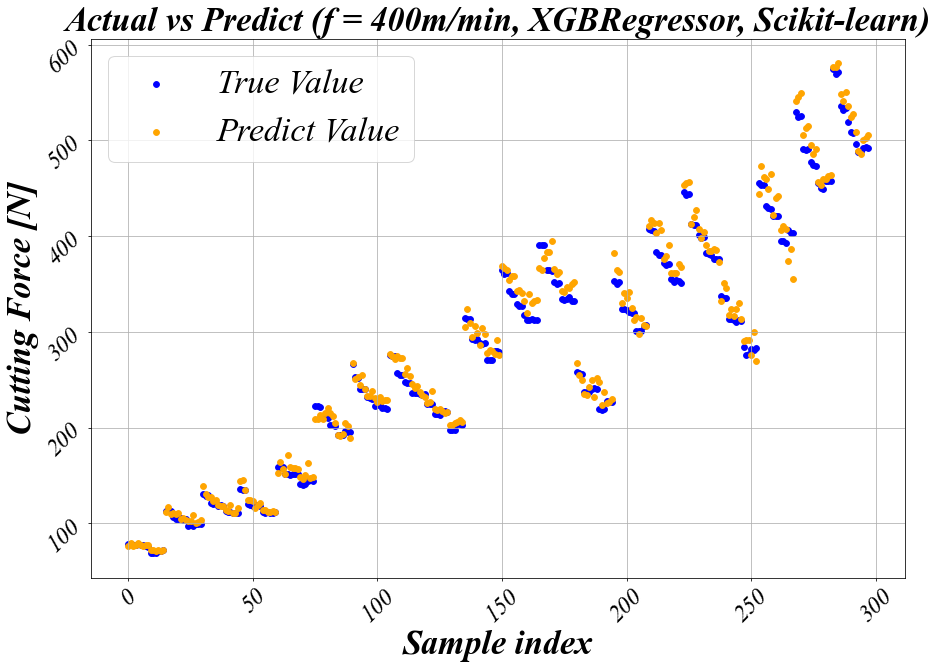

In [32]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 400m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

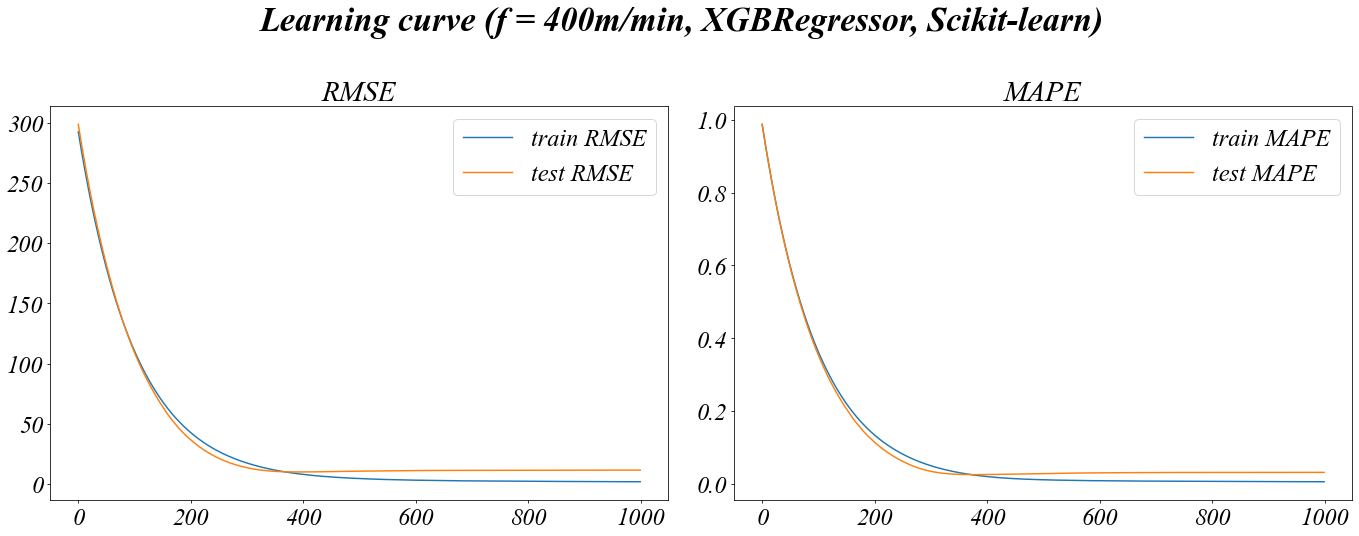

In [33]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 400m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 400_12800.png")

# ***feed 450 test***

In [34]:
train = pd.concat([feed_300, feed_350, feed_400, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [35]:
X_test = feed_450.iloc[: , 1:]
y_test = feed_450['RMS_CF_max']

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:288.95642	validation_0-mape:0.98751	validation_1-rmse:318.37558	validation_1-mape:0.98821
[1]	validation_0-rmse:286.12832	validation_0-mape:0.97763	validation_1-rmse:315.41376	validation_1-mape:0.97879
[2]	validation_0-rmse:283.32850	validation_0-mape:0.96785	validation_1-rmse:312.48320	validation_1-mape:0.96946
[3]	validation_0-rmse:280.55669	validation_0-mape:0.95817	validation_1-rmse:309.60132	validation_1-mape:0.96025
[4]	validation_0-rmse:277.81310	validation_0-mape:0.94859	validation_1-rmse:306.71408	validation_1-mape:0.95105
[5]	validation_0-rmse:275.09375	validation_0-mape:0.93909	validation_1-rmse:303.84736	validation_1-mape:0.94191
[6]	validation_0-rmse:272.40368	validation_0-mape:0.92970	validation_1-rmse:301.04305	validation_1-mape:0.93296
[7]	validation_0-rmse:269.73826	validation_0-mape:0.92038	validation_1-rmse:298.23288	validation_1-mape:0.92400
[8]	validation_0-rmse:267.10159	validation_0-mape:0.91117	validation_1-rmse:295.48460	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[16]	validation_0-rmse:246.92750	validation_0-mape:0.84070	validation_1-rmse:274.31306	validation_1-mape:0.84797
[17]	validation_0-rmse:244.51615	validation_0-mape:0.83227	validation_1-rmse:271.78104	validation_1-mape:0.83992
[18]	validation_0-rmse:242.13146	validation_0-mape:0.82394	validation_1-rmse:269.29028	validation_1-mape:0.83207
[19]	validation_0-rmse:239.76820	validation_0-mape:0.81568	validation_1-rmse:266.80944	validation_1-mape:0.82416
[20]	validation_0-rmse:237.43044	validation_0-mape:0.80752	validation_1-rmse:264.35653	validation_1-mape:0.81647
[21]	validation_0-rmse:235.11368	validation_0-mape:0.79942	validation_1-rmse:261.92278	validation_1-mape:0.80872
[22]	validation_0-rmse:232.82278	validation_0-mape:0.79142	validation_1-rmse:259.52930	validation_1-mape:0.80110
[23]	validation_0-rmse:230.55243	validation_0-mape:0.78348	validation_1-rmse:257.15095	validation_1-mape:0.79363
[24]	validation_0-rmse:228.30668	validation_0-mape:0.77564	validation_1-rmse:254.78569	validatio

[89]	validation_0-rmse:121.27328	validation_0-mape:0.40403	validation_1-rmse:140.33893	validation_1-mape:0.42479
[90]	validation_0-rmse:120.10764	validation_0-mape:0.40002	validation_1-rmse:139.05601	validation_1-mape:0.42080
[91]	validation_0-rmse:118.95287	validation_0-mape:0.39603	validation_1-rmse:137.80167	validation_1-mape:0.41692
[92]	validation_0-rmse:117.80981	validation_0-mape:0.39207	validation_1-rmse:136.58558	validation_1-mape:0.41307
[93]	validation_0-rmse:116.67531	validation_0-mape:0.38818	validation_1-rmse:135.35421	validation_1-mape:0.40923
[94]	validation_0-rmse:115.55429	validation_0-mape:0.38431	validation_1-rmse:134.16326	validation_1-mape:0.40545
[95]	validation_0-rmse:114.44245	validation_0-mape:0.38049	validation_1-rmse:132.94602	validation_1-mape:0.40166
[96]	validation_0-rmse:113.34224	validation_0-mape:0.37670	validation_1-rmse:131.72174	validation_1-mape:0.39784
[97]	validation_0-rmse:112.25505	validation_0-mape:0.37293	validation_1-rmse:130.49031	validatio

[162]	validation_0-rmse:60.26555	validation_0-mape:0.19493	validation_1-rmse:72.13649	validation_1-mape:0.21405
[163]	validation_0-rmse:59.69964	validation_0-mape:0.19299	validation_1-rmse:71.48418	validation_1-mape:0.21203
[164]	validation_0-rmse:59.13926	validation_0-mape:0.19108	validation_1-rmse:70.83058	validation_1-mape:0.21001
[165]	validation_0-rmse:58.58492	validation_0-mape:0.18918	validation_1-rmse:70.20341	validation_1-mape:0.20808
[166]	validation_0-rmse:58.03357	validation_0-mape:0.18730	validation_1-rmse:69.56180	validation_1-mape:0.20608
[167]	validation_0-rmse:57.48917	validation_0-mape:0.18545	validation_1-rmse:68.93790	validation_1-mape:0.20413
[168]	validation_0-rmse:56.95082	validation_0-mape:0.18361	validation_1-rmse:68.30417	validation_1-mape:0.20218
[169]	validation_0-rmse:56.41559	validation_0-mape:0.18179	validation_1-rmse:67.69268	validation_1-mape:0.20029
[170]	validation_0-rmse:55.88688	validation_0-mape:0.17999	validation_1-rmse:67.09450	validation_1-mape:

[236]	validation_0-rmse:30.27837	validation_0-mape:0.09345	validation_1-rmse:37.35292	validation_1-mape:0.10690
[237]	validation_0-rmse:30.00654	validation_0-mape:0.09253	validation_1-rmse:37.05460	validation_1-mape:0.10597
[238]	validation_0-rmse:29.73738	validation_0-mape:0.09162	validation_1-rmse:36.76203	validation_1-mape:0.10504
[239]	validation_0-rmse:29.46666	validation_0-mape:0.09072	validation_1-rmse:36.42279	validation_1-mape:0.10403
[240]	validation_0-rmse:29.19872	validation_0-mape:0.08983	validation_1-rmse:36.08915	validation_1-mape:0.10304
[241]	validation_0-rmse:28.93566	validation_0-mape:0.08894	validation_1-rmse:35.79073	validation_1-mape:0.10212
[242]	validation_0-rmse:28.67688	validation_0-mape:0.08806	validation_1-rmse:35.49929	validation_1-mape:0.10119
[243]	validation_0-rmse:28.41664	validation_0-mape:0.08720	validation_1-rmse:35.17673	validation_1-mape:0.10026
[244]	validation_0-rmse:28.15935	validation_0-mape:0.08634	validation_1-rmse:34.84853	validation_1-mape:

[310]	validation_0-rmse:15.79656	validation_0-mape:0.04506	validation_1-rmse:20.52989	validation_1-mape:0.05509
[311]	validation_0-rmse:15.66541	validation_0-mape:0.04462	validation_1-rmse:20.39095	validation_1-mape:0.05466
[312]	validation_0-rmse:15.53423	validation_0-mape:0.04419	validation_1-rmse:20.25923	validation_1-mape:0.05424
[313]	validation_0-rmse:15.40531	validation_0-mape:0.04376	validation_1-rmse:20.13560	validation_1-mape:0.05384
[314]	validation_0-rmse:15.27628	validation_0-mape:0.04334	validation_1-rmse:19.99074	validation_1-mape:0.05340
[315]	validation_0-rmse:15.14884	validation_0-mape:0.04293	validation_1-rmse:19.85539	validation_1-mape:0.05299
[316]	validation_0-rmse:15.02407	validation_0-mape:0.04251	validation_1-rmse:19.73119	validation_1-mape:0.05261
[317]	validation_0-rmse:14.89895	validation_0-mape:0.04210	validation_1-rmse:19.59242	validation_1-mape:0.05218
[318]	validation_0-rmse:14.77527	validation_0-mape:0.04170	validation_1-rmse:19.47108	validation_1-mape:

[384]	validation_0-rmse:8.83741	validation_0-mape:0.02279	validation_1-rmse:14.03267	validation_1-mape:0.03513
[385]	validation_0-rmse:8.77564	validation_0-mape:0.02260	validation_1-rmse:13.98083	validation_1-mape:0.03499
[386]	validation_0-rmse:8.71348	validation_0-mape:0.02241	validation_1-rmse:13.93607	validation_1-mape:0.03486
[387]	validation_0-rmse:8.65270	validation_0-mape:0.02223	validation_1-rmse:13.88507	validation_1-mape:0.03472
[388]	validation_0-rmse:8.58946	validation_0-mape:0.02204	validation_1-rmse:13.83762	validation_1-mape:0.03459
[389]	validation_0-rmse:8.52831	validation_0-mape:0.02185	validation_1-rmse:13.79686	validation_1-mape:0.03447
[390]	validation_0-rmse:8.46800	validation_0-mape:0.02167	validation_1-rmse:13.75687	validation_1-mape:0.03436
[391]	validation_0-rmse:8.40951	validation_0-mape:0.02150	validation_1-rmse:13.71095	validation_1-mape:0.03424
[392]	validation_0-rmse:8.34940	validation_0-mape:0.02131	validation_1-rmse:13.67265	validation_1-mape:0.03413
[

[458]	validation_0-rmse:5.56642	validation_0-mape:0.01353	validation_1-rmse:12.00783	validation_1-mape:0.02985
[459]	validation_0-rmse:5.53492	validation_0-mape:0.01345	validation_1-rmse:11.99905	validation_1-mape:0.02983
[460]	validation_0-rmse:5.50577	validation_0-mape:0.01338	validation_1-rmse:11.98762	validation_1-mape:0.02979
[461]	validation_0-rmse:5.47866	validation_0-mape:0.01332	validation_1-rmse:11.97088	validation_1-mape:0.02976
[462]	validation_0-rmse:5.44963	validation_0-mape:0.01325	validation_1-rmse:11.96039	validation_1-mape:0.02973
[463]	validation_0-rmse:5.42098	validation_0-mape:0.01318	validation_1-rmse:11.94997	validation_1-mape:0.02970
[464]	validation_0-rmse:5.39267	validation_0-mape:0.01311	validation_1-rmse:11.93994	validation_1-mape:0.02967
[465]	validation_0-rmse:5.36466	validation_0-mape:0.01305	validation_1-rmse:11.92699	validation_1-mape:0.02963
[466]	validation_0-rmse:5.33532	validation_0-mape:0.01297	validation_1-rmse:11.91679	validation_1-mape:0.02961
[

[532]	validation_0-rmse:3.98602	validation_0-mape:0.00996	validation_1-rmse:11.51397	validation_1-mape:0.02849
[533]	validation_0-rmse:3.97209	validation_0-mape:0.00994	validation_1-rmse:11.51211	validation_1-mape:0.02849
[534]	validation_0-rmse:3.95884	validation_0-mape:0.00991	validation_1-rmse:11.51106	validation_1-mape:0.02848
[535]	validation_0-rmse:3.94555	validation_0-mape:0.00989	validation_1-rmse:11.51026	validation_1-mape:0.02848
[536]	validation_0-rmse:3.93261	validation_0-mape:0.00986	validation_1-rmse:11.50916	validation_1-mape:0.02848
[537]	validation_0-rmse:3.91942	validation_0-mape:0.00984	validation_1-rmse:11.50657	validation_1-mape:0.02847
[538]	validation_0-rmse:3.90639	validation_0-mape:0.00981	validation_1-rmse:11.50570	validation_1-mape:0.02847
[539]	validation_0-rmse:3.89270	validation_0-mape:0.00979	validation_1-rmse:11.50356	validation_1-mape:0.02847
[540]	validation_0-rmse:3.87947	validation_0-mape:0.00976	validation_1-rmse:11.50135	validation_1-mape:0.02846
[

[606]	validation_0-rmse:3.16135	validation_0-mape:0.00844	validation_1-rmse:11.37462	validation_1-mape:0.02831
[607]	validation_0-rmse:3.15257	validation_0-mape:0.00842	validation_1-rmse:11.37110	validation_1-mape:0.02831
[608]	validation_0-rmse:3.14363	validation_0-mape:0.00841	validation_1-rmse:11.37120	validation_1-mape:0.02831
[609]	validation_0-rmse:3.13483	validation_0-mape:0.00839	validation_1-rmse:11.37043	validation_1-mape:0.02832
[610]	validation_0-rmse:3.12690	validation_0-mape:0.00837	validation_1-rmse:11.36628	validation_1-mape:0.02831
[611]	validation_0-rmse:3.11809	validation_0-mape:0.00836	validation_1-rmse:11.36655	validation_1-mape:0.02831
[612]	validation_0-rmse:3.11006	validation_0-mape:0.00834	validation_1-rmse:11.36255	validation_1-mape:0.02830
[613]	validation_0-rmse:3.10162	validation_0-mape:0.00833	validation_1-rmse:11.36189	validation_1-mape:0.02831
[614]	validation_0-rmse:3.09358	validation_0-mape:0.00831	validation_1-rmse:11.35870	validation_1-mape:0.02831
[

[680]	validation_0-rmse:2.64792	validation_0-mape:0.00750	validation_1-rmse:11.30419	validation_1-mape:0.02836
[681]	validation_0-rmse:2.64174	validation_0-mape:0.00749	validation_1-rmse:11.30635	validation_1-mape:0.02837
[682]	validation_0-rmse:2.63834	validation_0-mape:0.00749	validation_1-rmse:11.30376	validation_1-mape:0.02836
[683]	validation_0-rmse:2.63286	validation_0-mape:0.00748	validation_1-rmse:11.30481	validation_1-mape:0.02837
[684]	validation_0-rmse:2.62776	validation_0-mape:0.00746	validation_1-rmse:11.30537	validation_1-mape:0.02837
[685]	validation_0-rmse:2.62222	validation_0-mape:0.00745	validation_1-rmse:11.30738	validation_1-mape:0.02837
[686]	validation_0-rmse:2.61879	validation_0-mape:0.00745	validation_1-rmse:11.30498	validation_1-mape:0.02837
[687]	validation_0-rmse:2.61432	validation_0-mape:0.00744	validation_1-rmse:11.30637	validation_1-mape:0.02838
[688]	validation_0-rmse:2.61095	validation_0-mape:0.00743	validation_1-rmse:11.30403	validation_1-mape:0.02838
[

[754]	validation_0-rmse:2.30732	validation_0-mape:0.00678	validation_1-rmse:11.29620	validation_1-mape:0.02841
[755]	validation_0-rmse:2.30529	validation_0-mape:0.00677	validation_1-rmse:11.29687	validation_1-mape:0.02841
[756]	validation_0-rmse:2.30330	validation_0-mape:0.00677	validation_1-rmse:11.29755	validation_1-mape:0.02842
[757]	validation_0-rmse:2.29874	validation_0-mape:0.00676	validation_1-rmse:11.29705	validation_1-mape:0.02842
[758]	validation_0-rmse:2.29471	validation_0-mape:0.00675	validation_1-rmse:11.29855	validation_1-mape:0.02842
[759]	validation_0-rmse:2.29210	validation_0-mape:0.00674	validation_1-rmse:11.29861	validation_1-mape:0.02842
[760]	validation_0-rmse:2.28936	validation_0-mape:0.00673	validation_1-rmse:11.29870	validation_1-mape:0.02842
[761]	validation_0-rmse:2.28743	validation_0-mape:0.00673	validation_1-rmse:11.29935	validation_1-mape:0.02843
[762]	validation_0-rmse:2.28341	validation_0-mape:0.00672	validation_1-rmse:11.29833	validation_1-mape:0.02843
[

[828]	validation_0-rmse:2.07859	validation_0-mape:0.00622	validation_1-rmse:11.31873	validation_1-mape:0.02849
[829]	validation_0-rmse:2.07613	validation_0-mape:0.00621	validation_1-rmse:11.31895	validation_1-mape:0.02849
[830]	validation_0-rmse:2.07499	validation_0-mape:0.00621	validation_1-rmse:11.31928	validation_1-mape:0.02849
[831]	validation_0-rmse:2.07244	validation_0-mape:0.00620	validation_1-rmse:11.31876	validation_1-mape:0.02849
[832]	validation_0-rmse:2.07132	validation_0-mape:0.00620	validation_1-rmse:11.31908	validation_1-mape:0.02849
[833]	validation_0-rmse:2.07037	validation_0-mape:0.00620	validation_1-rmse:11.31947	validation_1-mape:0.02849
[834]	validation_0-rmse:2.06828	validation_0-mape:0.00619	validation_1-rmse:11.31970	validation_1-mape:0.02849
[835]	validation_0-rmse:2.06718	validation_0-mape:0.00619	validation_1-rmse:11.32002	validation_1-mape:0.02849
[836]	validation_0-rmse:2.06398	validation_0-mape:0.00618	validation_1-rmse:11.31958	validation_1-mape:0.02849
[

[902]	validation_0-rmse:1.93331	validation_0-mape:0.00584	validation_1-rmse:11.32606	validation_1-mape:0.02848
[903]	validation_0-rmse:1.93080	validation_0-mape:0.00583	validation_1-rmse:11.32566	validation_1-mape:0.02848
[904]	validation_0-rmse:1.92877	validation_0-mape:0.00583	validation_1-rmse:11.32627	validation_1-mape:0.02848
[905]	validation_0-rmse:1.92787	validation_0-mape:0.00582	validation_1-rmse:11.32649	validation_1-mape:0.02848
[906]	validation_0-rmse:1.92660	validation_0-mape:0.00582	validation_1-rmse:11.32619	validation_1-mape:0.02848
[907]	validation_0-rmse:1.92499	validation_0-mape:0.00581	validation_1-rmse:11.32644	validation_1-mape:0.02848
[908]	validation_0-rmse:1.92351	validation_0-mape:0.00581	validation_1-rmse:11.32687	validation_1-mape:0.02848
[909]	validation_0-rmse:1.92122	validation_0-mape:0.00580	validation_1-rmse:11.32712	validation_1-mape:0.02848
[910]	validation_0-rmse:1.91953	validation_0-mape:0.00580	validation_1-rmse:11.32725	validation_1-mape:0.02848
[

[976]	validation_0-rmse:1.82007	validation_0-mape:0.00552	validation_1-rmse:11.33167	validation_1-mape:0.02847
[977]	validation_0-rmse:1.81844	validation_0-mape:0.00552	validation_1-rmse:11.33143	validation_1-mape:0.02848
[978]	validation_0-rmse:1.81682	validation_0-mape:0.00552	validation_1-rmse:11.33076	validation_1-mape:0.02848
[979]	validation_0-rmse:1.81529	validation_0-mape:0.00551	validation_1-rmse:11.33054	validation_1-mape:0.02848
[980]	validation_0-rmse:1.81365	validation_0-mape:0.00551	validation_1-rmse:11.33001	validation_1-mape:0.02847
[981]	validation_0-rmse:1.81101	validation_0-mape:0.00550	validation_1-rmse:11.33049	validation_1-mape:0.02847
[982]	validation_0-rmse:1.80941	validation_0-mape:0.00550	validation_1-rmse:11.33032	validation_1-mape:0.02848
[983]	validation_0-rmse:1.80827	validation_0-mape:0.00549	validation_1-rmse:11.33038	validation_1-mape:0.02848
[984]	validation_0-rmse:1.80712	validation_0-mape:0.00549	validation_1-rmse:11.33121	validation_1-mape:0.02848
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7817
Train MAPE: 0.5426
Test RMSE: 11.3258
Test MAPE: 2.8487


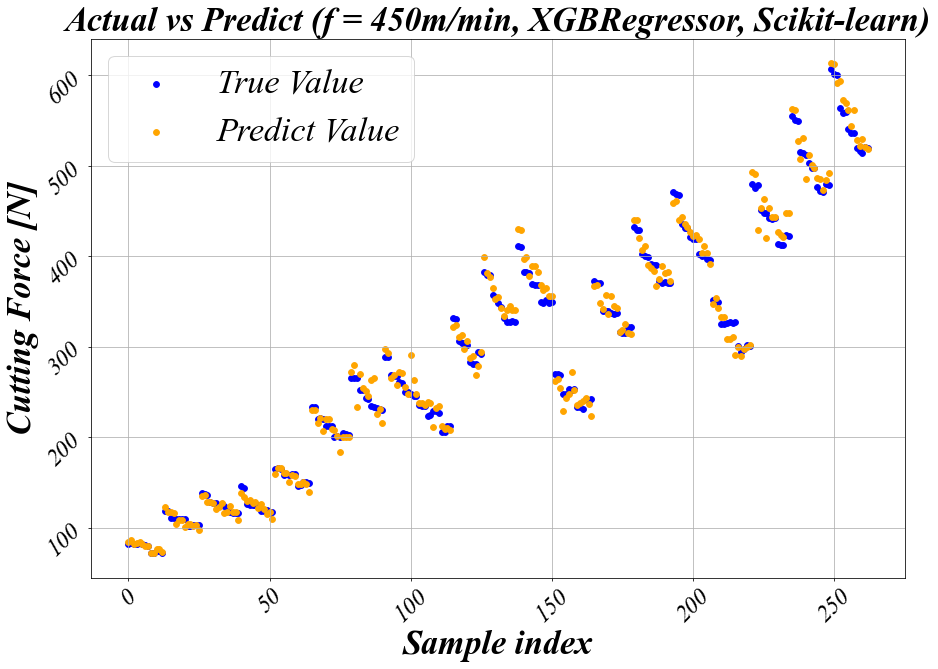

In [39]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 450m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

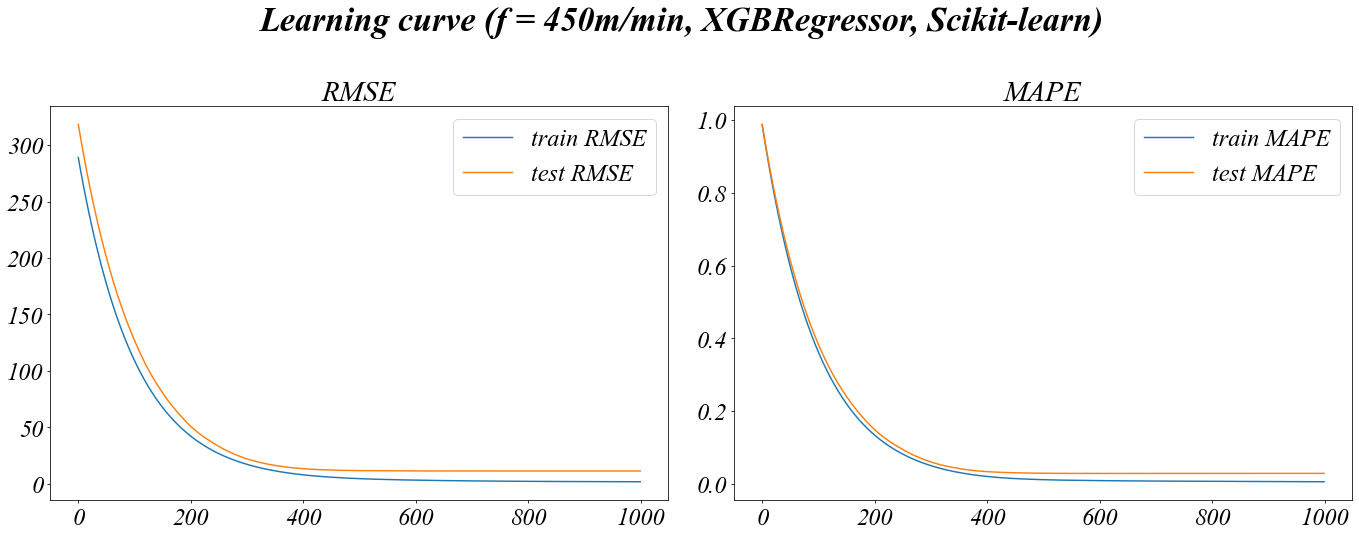

In [40]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 450m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 450_12800.png")

# ***feed 500 test***

In [41]:
train = pd.concat([feed_300, feed_350, feed_400, feed_450], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [42]:
X_test = feed_500.iloc[: , 1:]
y_test = feed_500['RMS_CF_max']

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:285.89636	validation_0-mape:0.98748	validation_1-rmse:328.67855	validation_1-mape:0.98874
[1]	validation_0-rmse:283.09428	validation_0-mape:0.97759	validation_1-rmse:325.76076	validation_1-mape:0.97977
[2]	validation_0-rmse:280.32023	validation_0-mape:0.96780	validation_1-rmse:322.87215	validation_1-mape:0.97089
[3]	validation_0-rmse:277.57385	validation_0-mape:0.95812	validation_1-rmse:320.00866	validation_1-mape:0.96209
[4]	validation_0-rmse:274.85185	validation_0-mape:0.94854	validation_1-rmse:317.22388	validation_1-mape:0.95363
[5]	validation_0-rmse:272.15708	validation_0-mape:0.93906	validation_1-rmse:314.47502	validation_1-mape:0.94530
[6]	validation_0-rmse:269.49180	validation_0-mape:0.92968	validation_1-rmse:311.69866	validation_1-mape:0.93677
[7]	validation_0-rmse:266.85039	validation_0-mape:0.92039	validation_1-rmse:308.97037	validation_1-mape:0.92854
[8]	validation_0-rmse:264.23538	validation_0-mape:0.91120	validation_1-rmse:306.29472	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[15]	validation_0-rmse:246.65051	validation_0-mape:0.84937	validation_1-rmse:288.09280	validation_1-mape:0.86511
[16]	validation_0-rmse:244.23964	validation_0-mape:0.84089	validation_1-rmse:285.57034	validation_1-mape:0.85721
[17]	validation_0-rmse:241.84863	validation_0-mape:0.83249	validation_1-rmse:283.10205	validation_1-mape:0.84978
[18]	validation_0-rmse:239.48147	validation_0-mape:0.82418	validation_1-rmse:280.68122	validation_1-mape:0.84237
[19]	validation_0-rmse:237.13795	validation_0-mape:0.81594	validation_1-rmse:278.26167	validation_1-mape:0.83508
[20]	validation_0-rmse:234.82109	validation_0-mape:0.80779	validation_1-rmse:275.81434	validation_1-mape:0.82749
[21]	validation_0-rmse:232.52469	validation_0-mape:0.79972	validation_1-rmse:273.44227	validation_1-mape:0.82034
[22]	validation_0-rmse:230.25038	validation_0-mape:0.79172	validation_1-rmse:271.08928	validation_1-mape:0.81317
[23]	validation_0-rmse:227.99962	validation_0-mape:0.78381	validation_1-rmse:268.76430	validatio

[88]	validation_0-rmse:120.86830	validation_0-mape:0.40807	validation_1-rmse:156.54488	validation_1-mape:0.46086
[89]	validation_0-rmse:119.70468	validation_0-mape:0.40399	validation_1-rmse:155.31253	validation_1-mape:0.45699
[90]	validation_0-rmse:118.54883	validation_0-mape:0.39997	validation_1-rmse:154.10825	validation_1-mape:0.45322
[91]	validation_0-rmse:117.40760	validation_0-mape:0.39597	validation_1-rmse:152.89525	validation_1-mape:0.44950
[92]	validation_0-rmse:116.27590	validation_0-mape:0.39202	validation_1-rmse:151.71083	validation_1-mape:0.44578
[93]	validation_0-rmse:115.15401	validation_0-mape:0.38812	validation_1-rmse:150.52252	validation_1-mape:0.44210
[94]	validation_0-rmse:114.04208	validation_0-mape:0.38425	validation_1-rmse:149.33077	validation_1-mape:0.43833
[95]	validation_0-rmse:112.94236	validation_0-mape:0.38043	validation_1-rmse:148.14787	validation_1-mape:0.43472
[96]	validation_0-rmse:111.85232	validation_0-mape:0.37665	validation_1-rmse:146.97710	validatio

[161]	validation_0-rmse:59.93516	validation_0-mape:0.19679	validation_1-rmse:89.47557	validation_1-mape:0.25360
[162]	validation_0-rmse:59.36810	validation_0-mape:0.19484	validation_1-rmse:88.82289	validation_1-mape:0.25159
[163]	validation_0-rmse:58.80441	validation_0-mape:0.19291	validation_1-rmse:88.16775	validation_1-mape:0.24959
[164]	validation_0-rmse:58.24637	validation_0-mape:0.19100	validation_1-rmse:87.51796	validation_1-mape:0.24761
[165]	validation_0-rmse:57.69401	validation_0-mape:0.18911	validation_1-rmse:86.87616	validation_1-mape:0.24565
[166]	validation_0-rmse:57.14714	validation_0-mape:0.18724	validation_1-rmse:86.23950	validation_1-mape:0.24370
[167]	validation_0-rmse:56.60583	validation_0-mape:0.18538	validation_1-rmse:85.60872	validation_1-mape:0.24176
[168]	validation_0-rmse:56.06972	validation_0-mape:0.18355	validation_1-rmse:85.00116	validation_1-mape:0.23989
[169]	validation_0-rmse:55.53983	validation_0-mape:0.18174	validation_1-rmse:84.37175	validation_1-mape:

[235]	validation_0-rmse:29.95642	validation_0-mape:0.09430	validation_1-rmse:54.41507	validation_1-mape:0.14574
[236]	validation_0-rmse:29.68318	validation_0-mape:0.09336	validation_1-rmse:54.09098	validation_1-mape:0.14475
[237]	validation_0-rmse:29.41016	validation_0-mape:0.09244	validation_1-rmse:53.74940	validation_1-mape:0.14374
[238]	validation_0-rmse:29.14010	validation_0-mape:0.09153	validation_1-rmse:53.43189	validation_1-mape:0.14279
[239]	validation_0-rmse:28.87446	validation_0-mape:0.09062	validation_1-rmse:53.09842	validation_1-mape:0.14176
[240]	validation_0-rmse:28.60976	validation_0-mape:0.08973	validation_1-rmse:52.76487	validation_1-mape:0.14079
[241]	validation_0-rmse:28.35008	validation_0-mape:0.08884	validation_1-rmse:52.45026	validation_1-mape:0.13985
[242]	validation_0-rmse:28.09244	validation_0-mape:0.08796	validation_1-rmse:52.14684	validation_1-mape:0.13893
[243]	validation_0-rmse:27.83531	validation_0-mape:0.08710	validation_1-rmse:51.83555	validation_1-mape:

[309]	validation_0-rmse:15.47106	validation_0-mape:0.04531	validation_1-rmse:36.58386	validation_1-mape:0.09102
[310]	validation_0-rmse:15.33714	validation_0-mape:0.04486	validation_1-rmse:36.41770	validation_1-mape:0.09050
[311]	validation_0-rmse:15.20628	validation_0-mape:0.04443	validation_1-rmse:36.25670	validation_1-mape:0.09001
[312]	validation_0-rmse:15.07688	validation_0-mape:0.04399	validation_1-rmse:36.09189	validation_1-mape:0.08950
[313]	validation_0-rmse:14.94875	validation_0-mape:0.04357	validation_1-rmse:35.93076	validation_1-mape:0.08901
[314]	validation_0-rmse:14.82203	validation_0-mape:0.04314	validation_1-rmse:35.76907	validation_1-mape:0.08852
[315]	validation_0-rmse:14.69446	validation_0-mape:0.04272	validation_1-rmse:35.61077	validation_1-mape:0.08803
[316]	validation_0-rmse:14.57014	validation_0-mape:0.04231	validation_1-rmse:35.45744	validation_1-mape:0.08757
[317]	validation_0-rmse:14.44724	validation_0-mape:0.04190	validation_1-rmse:35.29824	validation_1-mape:

[383]	validation_0-rmse:8.50910	validation_0-mape:0.02254	validation_1-rmse:27.83846	validation_1-mape:0.06468
[384]	validation_0-rmse:8.44713	validation_0-mape:0.02235	validation_1-rmse:27.74662	validation_1-mape:0.06442
[385]	validation_0-rmse:8.38458	validation_0-mape:0.02215	validation_1-rmse:27.67469	validation_1-mape:0.06419
[386]	validation_0-rmse:8.32274	validation_0-mape:0.02196	validation_1-rmse:27.60454	validation_1-mape:0.06397
[387]	validation_0-rmse:8.26315	validation_0-mape:0.02177	validation_1-rmse:27.52697	validation_1-mape:0.06374
[388]	validation_0-rmse:8.20394	validation_0-mape:0.02159	validation_1-rmse:27.44406	validation_1-mape:0.06351
[389]	validation_0-rmse:8.14376	validation_0-mape:0.02140	validation_1-rmse:27.37630	validation_1-mape:0.06330
[390]	validation_0-rmse:8.08428	validation_0-mape:0.02122	validation_1-rmse:27.30939	validation_1-mape:0.06309
[391]	validation_0-rmse:8.02711	validation_0-mape:0.02103	validation_1-rmse:27.23587	validation_1-mape:0.06287
[

[457]	validation_0-rmse:5.17894	validation_0-mape:0.01278	validation_1-rmse:23.59904	validation_1-mape:0.05231
[458]	validation_0-rmse:5.14810	validation_0-mape:0.01270	validation_1-rmse:23.55562	validation_1-mape:0.05219
[459]	validation_0-rmse:5.11826	validation_0-mape:0.01263	validation_1-rmse:23.51822	validation_1-mape:0.05209
[460]	validation_0-rmse:5.08824	validation_0-mape:0.01254	validation_1-rmse:23.47686	validation_1-mape:0.05198
[461]	validation_0-rmse:5.06001	validation_0-mape:0.01246	validation_1-rmse:23.43416	validation_1-mape:0.05186
[462]	validation_0-rmse:5.03060	validation_0-mape:0.01239	validation_1-rmse:23.39717	validation_1-mape:0.05176
[463]	validation_0-rmse:5.00178	validation_0-mape:0.01232	validation_1-rmse:23.36423	validation_1-mape:0.05167
[464]	validation_0-rmse:4.97265	validation_0-mape:0.01224	validation_1-rmse:23.32755	validation_1-mape:0.05156
[465]	validation_0-rmse:4.94568	validation_0-mape:0.01217	validation_1-rmse:23.28516	validation_1-mape:0.05145
[

[531]	validation_0-rmse:3.52715	validation_0-mape:0.00902	validation_1-rmse:21.44766	validation_1-mape:0.04640
[532]	validation_0-rmse:3.51167	validation_0-mape:0.00899	validation_1-rmse:21.42547	validation_1-mape:0.04634
[533]	validation_0-rmse:3.49631	validation_0-mape:0.00896	validation_1-rmse:21.40718	validation_1-mape:0.04629
[534]	validation_0-rmse:3.48040	validation_0-mape:0.00892	validation_1-rmse:21.38636	validation_1-mape:0.04624
[535]	validation_0-rmse:3.46560	validation_0-mape:0.00889	validation_1-rmse:21.36836	validation_1-mape:0.04619
[536]	validation_0-rmse:3.44991	validation_0-mape:0.00886	validation_1-rmse:21.34892	validation_1-mape:0.04613
[537]	validation_0-rmse:3.43511	validation_0-mape:0.00883	validation_1-rmse:21.32787	validation_1-mape:0.04607
[538]	validation_0-rmse:3.41976	validation_0-mape:0.00880	validation_1-rmse:21.30878	validation_1-mape:0.04601
[539]	validation_0-rmse:3.40479	validation_0-mape:0.00877	validation_1-rmse:21.29176	validation_1-mape:0.04597
[

[605]	validation_0-rmse:2.70952	validation_0-mape:0.00746	validation_1-rmse:20.29932	validation_1-mape:0.04335
[606]	validation_0-rmse:2.70211	validation_0-mape:0.00744	validation_1-rmse:20.28579	validation_1-mape:0.04331
[607]	validation_0-rmse:2.69452	validation_0-mape:0.00743	validation_1-rmse:20.27541	validation_1-mape:0.04329
[608]	validation_0-rmse:2.68695	validation_0-mape:0.00742	validation_1-rmse:20.26568	validation_1-mape:0.04326
[609]	validation_0-rmse:2.67897	validation_0-mape:0.00740	validation_1-rmse:20.25545	validation_1-mape:0.04324
[610]	validation_0-rmse:2.67186	validation_0-mape:0.00739	validation_1-rmse:20.24224	validation_1-mape:0.04320
[611]	validation_0-rmse:2.66462	validation_0-mape:0.00738	validation_1-rmse:20.23224	validation_1-mape:0.04318
[612]	validation_0-rmse:2.65762	validation_0-mape:0.00736	validation_1-rmse:20.21925	validation_1-mape:0.04314
[613]	validation_0-rmse:2.65012	validation_0-mape:0.00735	validation_1-rmse:20.20984	validation_1-mape:0.04312
[

[679]	validation_0-rmse:2.26990	validation_0-mape:0.00655	validation_1-rmse:19.66654	validation_1-mape:0.04171
[680]	validation_0-rmse:2.26436	validation_0-mape:0.00654	validation_1-rmse:19.66036	validation_1-mape:0.04169
[681]	validation_0-rmse:2.25987	validation_0-mape:0.00653	validation_1-rmse:19.65541	validation_1-mape:0.04168
[682]	validation_0-rmse:2.25540	validation_0-mape:0.00652	validation_1-rmse:19.64890	validation_1-mape:0.04166
[683]	validation_0-rmse:2.25099	validation_0-mape:0.00651	validation_1-rmse:19.64372	validation_1-mape:0.04165
[684]	validation_0-rmse:2.24639	validation_0-mape:0.00650	validation_1-rmse:19.63772	validation_1-mape:0.04163
[685]	validation_0-rmse:2.24135	validation_0-mape:0.00648	validation_1-rmse:19.63244	validation_1-mape:0.04162
[686]	validation_0-rmse:2.23706	validation_0-mape:0.00647	validation_1-rmse:19.62769	validation_1-mape:0.04161
[687]	validation_0-rmse:2.23274	validation_0-mape:0.00646	validation_1-rmse:19.62209	validation_1-mape:0.04160
[

[753]	validation_0-rmse:1.99439	validation_0-mape:0.00589	validation_1-rmse:19.35390	validation_1-mape:0.04087
[754]	validation_0-rmse:1.99039	validation_0-mape:0.00588	validation_1-rmse:19.35015	validation_1-mape:0.04086
[755]	validation_0-rmse:1.98907	validation_0-mape:0.00588	validation_1-rmse:19.34811	validation_1-mape:0.04085
[756]	validation_0-rmse:1.98599	validation_0-mape:0.00587	validation_1-rmse:19.34571	validation_1-mape:0.04084
[757]	validation_0-rmse:1.98257	validation_0-mape:0.00586	validation_1-rmse:19.34218	validation_1-mape:0.04083
[758]	validation_0-rmse:1.98071	validation_0-mape:0.00586	validation_1-rmse:19.33813	validation_1-mape:0.04082
[759]	validation_0-rmse:1.97937	validation_0-mape:0.00586	validation_1-rmse:19.33599	validation_1-mape:0.04081
[760]	validation_0-rmse:1.97551	validation_0-mape:0.00585	validation_1-rmse:19.33443	validation_1-mape:0.04081
[761]	validation_0-rmse:1.97366	validation_0-mape:0.00584	validation_1-rmse:19.33082	validation_1-mape:0.04080
[

[827]	validation_0-rmse:1.79744	validation_0-mape:0.00541	validation_1-rmse:19.18059	validation_1-mape:0.04045
[828]	validation_0-rmse:1.79626	validation_0-mape:0.00540	validation_1-rmse:19.17822	validation_1-mape:0.04045
[829]	validation_0-rmse:1.79372	validation_0-mape:0.00540	validation_1-rmse:19.17646	validation_1-mape:0.04044
[830]	validation_0-rmse:1.79247	validation_0-mape:0.00539	validation_1-rmse:19.17543	validation_1-mape:0.04044
[831]	validation_0-rmse:1.79135	validation_0-mape:0.00539	validation_1-rmse:19.17310	validation_1-mape:0.04044
[832]	validation_0-rmse:1.79020	validation_0-mape:0.00539	validation_1-rmse:19.17078	validation_1-mape:0.04043
[833]	validation_0-rmse:1.78800	validation_0-mape:0.00538	validation_1-rmse:19.16877	validation_1-mape:0.04043
[834]	validation_0-rmse:1.78643	validation_0-mape:0.00538	validation_1-rmse:19.16658	validation_1-mape:0.04043
[835]	validation_0-rmse:1.78527	validation_0-mape:0.00538	validation_1-rmse:19.16479	validation_1-mape:0.04042
[

[901]	validation_0-rmse:1.67140	validation_0-mape:0.00506	validation_1-rmse:19.08059	validation_1-mape:0.04026
[902]	validation_0-rmse:1.67094	validation_0-mape:0.00506	validation_1-rmse:19.07968	validation_1-mape:0.04025
[903]	validation_0-rmse:1.66896	validation_0-mape:0.00505	validation_1-rmse:19.07842	validation_1-mape:0.04025
[904]	validation_0-rmse:1.66847	validation_0-mape:0.00505	validation_1-rmse:19.07802	validation_1-mape:0.04025
[905]	validation_0-rmse:1.66590	validation_0-mape:0.00504	validation_1-rmse:19.07778	validation_1-mape:0.04025
[906]	validation_0-rmse:1.66359	validation_0-mape:0.00503	validation_1-rmse:19.07705	validation_1-mape:0.04025
[907]	validation_0-rmse:1.66311	validation_0-mape:0.00503	validation_1-rmse:19.07667	validation_1-mape:0.04025
[908]	validation_0-rmse:1.66196	validation_0-mape:0.00503	validation_1-rmse:19.07515	validation_1-mape:0.04025
[909]	validation_0-rmse:1.66059	validation_0-mape:0.00503	validation_1-rmse:19.07389	validation_1-mape:0.04025
[

[975]	validation_0-rmse:1.56554	validation_0-mape:0.00476	validation_1-rmse:19.02074	validation_1-mape:0.04014
[976]	validation_0-rmse:1.56312	validation_0-mape:0.00475	validation_1-rmse:19.02023	validation_1-mape:0.04014
[977]	validation_0-rmse:1.56114	validation_0-mape:0.00474	validation_1-rmse:19.01972	validation_1-mape:0.04013
[978]	validation_0-rmse:1.55909	validation_0-mape:0.00474	validation_1-rmse:19.01944	validation_1-mape:0.04014
[979]	validation_0-rmse:1.55831	validation_0-mape:0.00474	validation_1-rmse:19.01941	validation_1-mape:0.04014
[980]	validation_0-rmse:1.55735	validation_0-mape:0.00473	validation_1-rmse:19.01885	validation_1-mape:0.04013
[981]	validation_0-rmse:1.55511	validation_0-mape:0.00473	validation_1-rmse:19.01617	validation_1-mape:0.04013
[982]	validation_0-rmse:1.55435	validation_0-mape:0.00473	validation_1-rmse:19.01559	validation_1-mape:0.04013
[983]	validation_0-rmse:1.55294	validation_0-mape:0.00472	validation_1-rmse:19.01400	validation_1-mape:0.04012
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.5324
Train MAPE: 0.4668
Test RMSE: 19.0054
Test MAPE: 4.0107


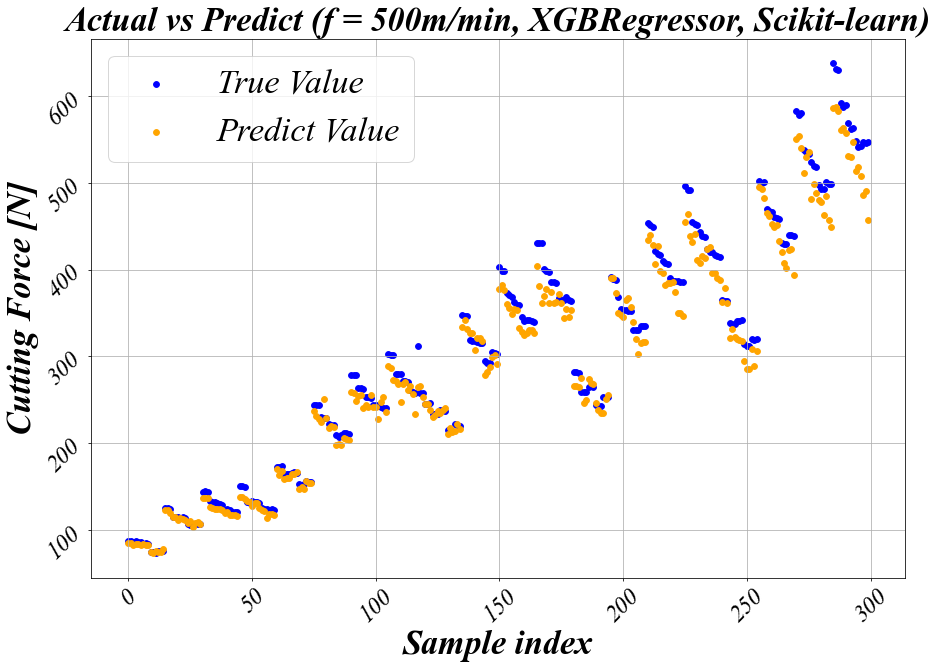

In [46]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 500m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

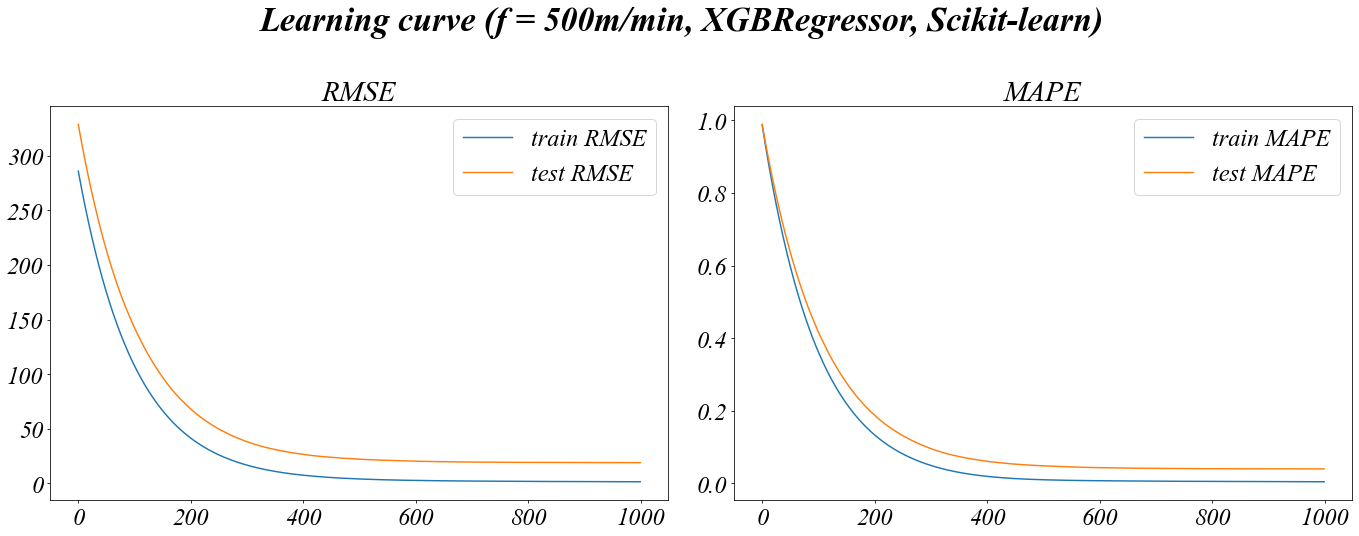

In [47]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 500m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 500_12800.png")